In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.dates import (YEARLY, DateFormatter,
                              rrulewrapper, RRuleLocator, drange)
import datetime   # package that helps manipulate dates
import matplotlib.dates as mdates
import calendar

from dateutil.parser import parse     # package for date parsing




In [2]:
bjg_df = pd.read_csv('data/aqicn/beijing, west park.csv') # Capital city
pzh_df = pd.read_csv('data/aqicn/panzhihua.csv') # Steel industry
szh_df = pd.read_csv('data/aqicn/shuozhou.csv') # Coal center, Shanxi
btu_df = pd.read_csv('data/aqicn/baotou.csv') # REE mining at Bayan Obo
gzh_df = pd.read_csv('data/aqicn/ganzhou.csv')
tsh_df = pd.read_csv('data/aqicn/tangshan.csv')

In [3]:
list_df = [bjg_df, pzh_df, szh_df, btu_df, gzh_df, tsh_df] # Update as needed
list_df_new=[]

for df in list_df:
    data = df.copy()
    data.date = pd.to_datetime(data.date)
    data = data.sort_values(by='date', ascending=False)

    data.columns = ['date','PM25','PM10','O3','NO2','SO2','CO']

    for col in data.columns:
        if col != "date":
            data[col] = pd.to_numeric(data[col], errors='coerce')

    data = data.dropna()
    data = data.sort_values('date', ascending=False)
    
    list_df_new.append(data)

[bjg_df, pzh_df, szh_df, btu_df, gzh_df, tsh_df] = list_df_new # Update as needed


C:\Users\Sehong\AppData\Local\Temp\ipykernel_37560\2067327585.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data.date = pd.to_datetime(data.date)


In [4]:
pzh_df ['NO2/SO2'] = pzh_df['NO2']/pzh_df['SO2']

In [5]:
from utils import plot_df, air_pairplot, air_cormatrix, monthlyAverage, df_ratio

In [6]:
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})  # increase dots per inch ...

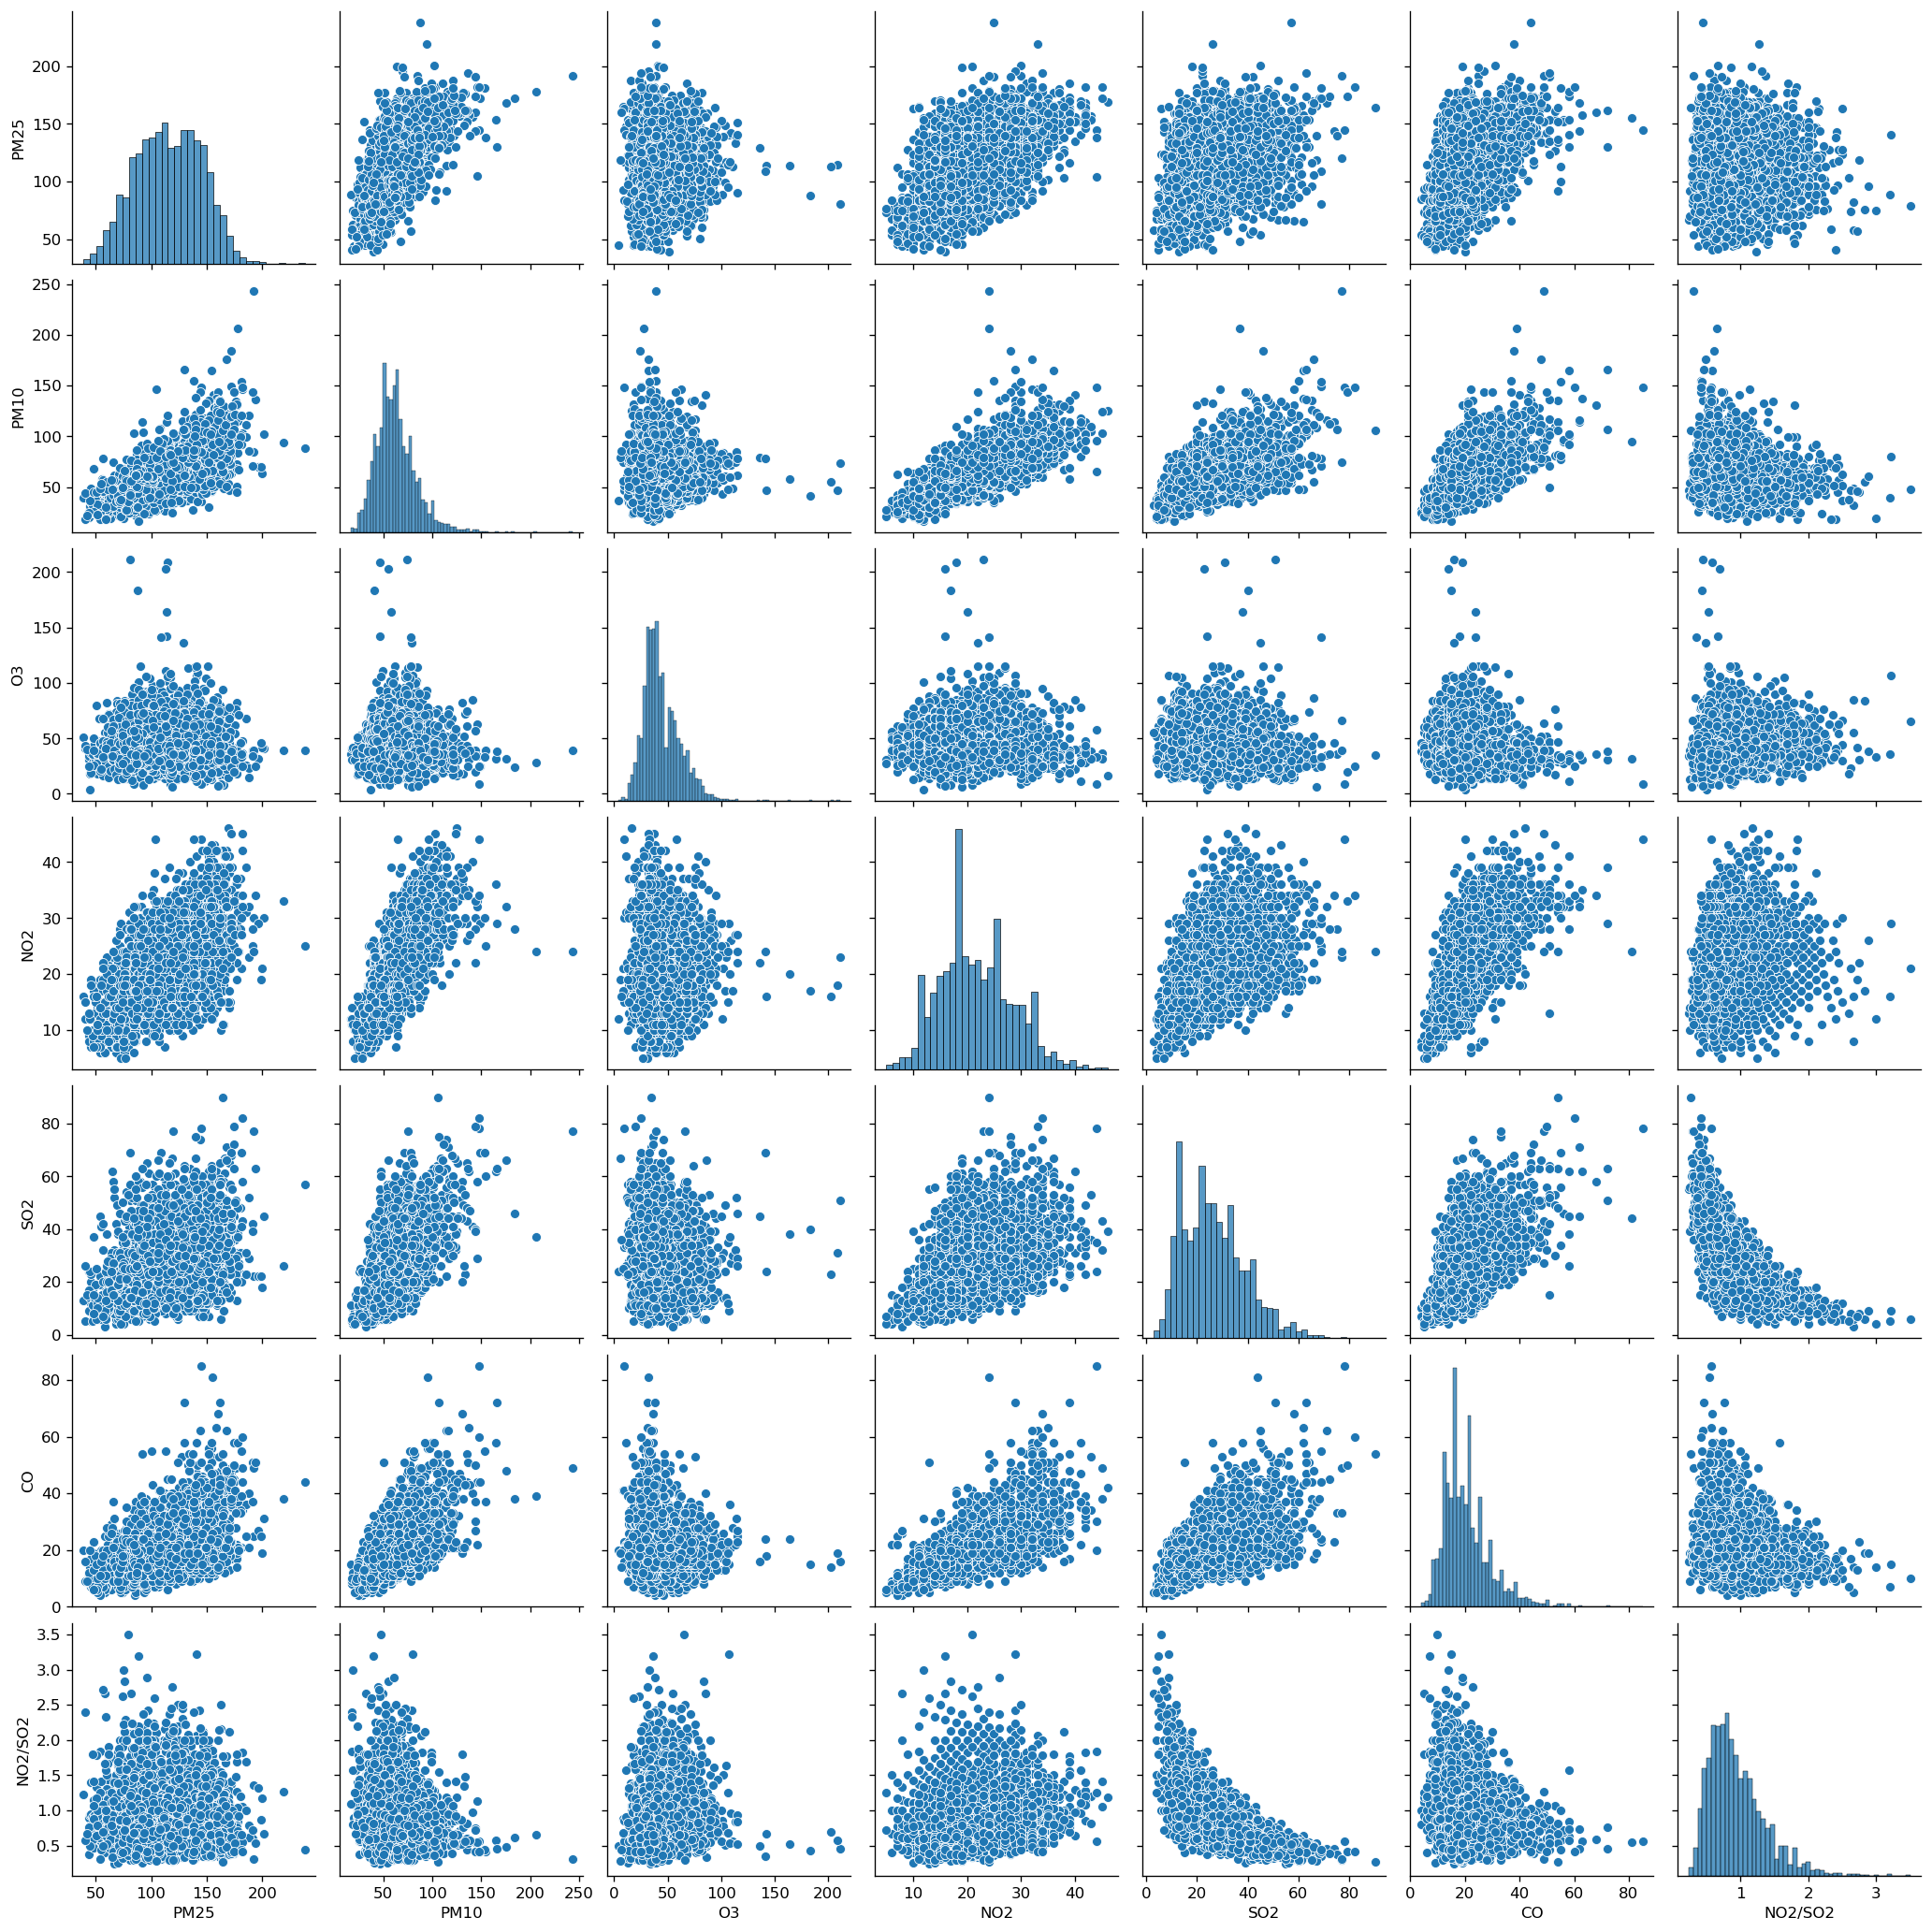

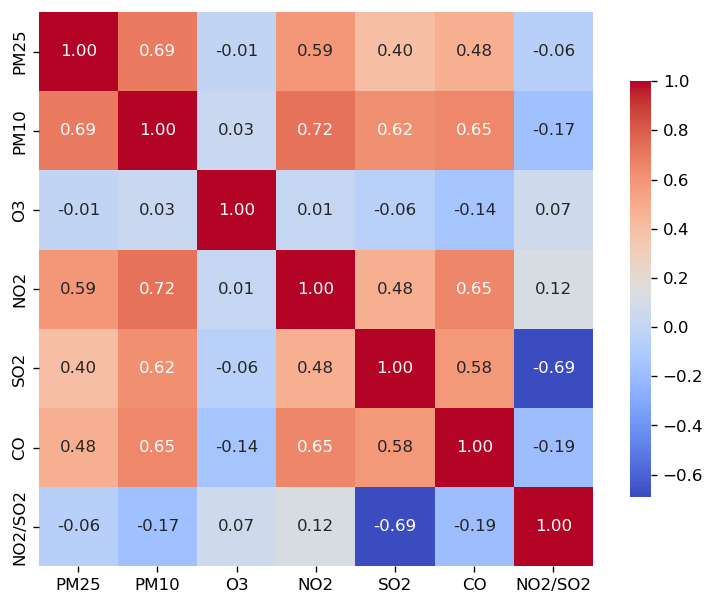

In [7]:
air_pairplot(pzh_df)
air_cormatrix(pzh_df)

# Remark
$NO_2$ is primarily associated with traffic emissions, while $SO_2$ mainly originates from cumbustion in factories and power plants.
Given that $\frac{NO_2}{SO_2}$ shows weak relationship with $NO_2$, a negative relationship with $SO_2$, and that the ratio has been increasing over time. Moreover, based on the graph we produced, $SO_2$ is decreasing and $NO_2$ has seasonality but stable. This suggests that factories may be emitting fewer air pollutants, potentially due to regulatory measures, fuel switching, or changes in industrial activity.

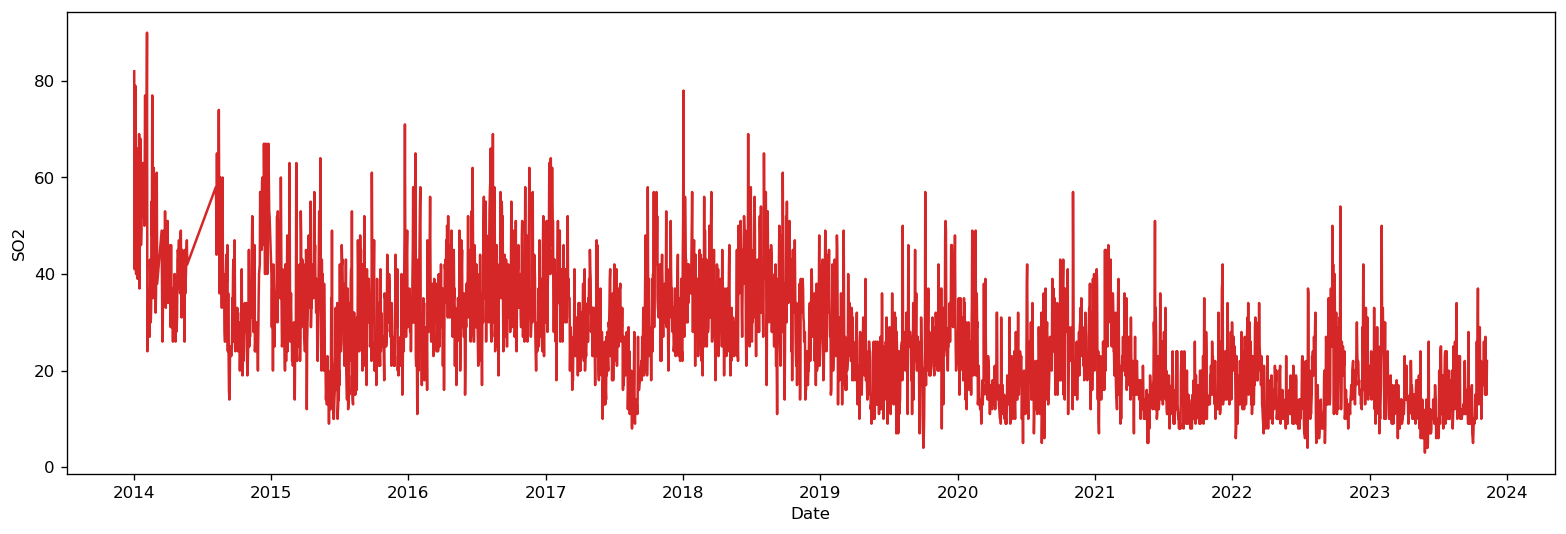

In [8]:
plot_df(pzh_df, pzh_df.date, pzh_df.SO2, xlabel ='Date', ylabel ='SO2')

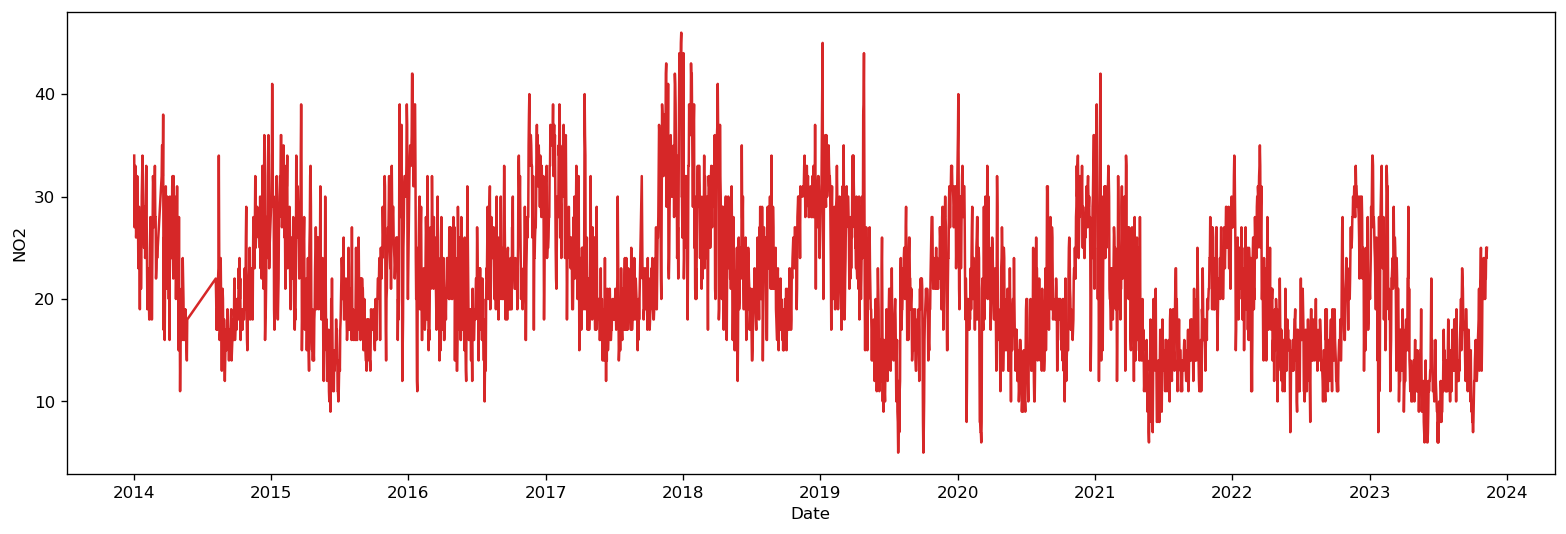

In [9]:
plot_df(pzh_df, pzh_df.date, pzh_df.NO2, xlabel ='Date', ylabel ='NO2')

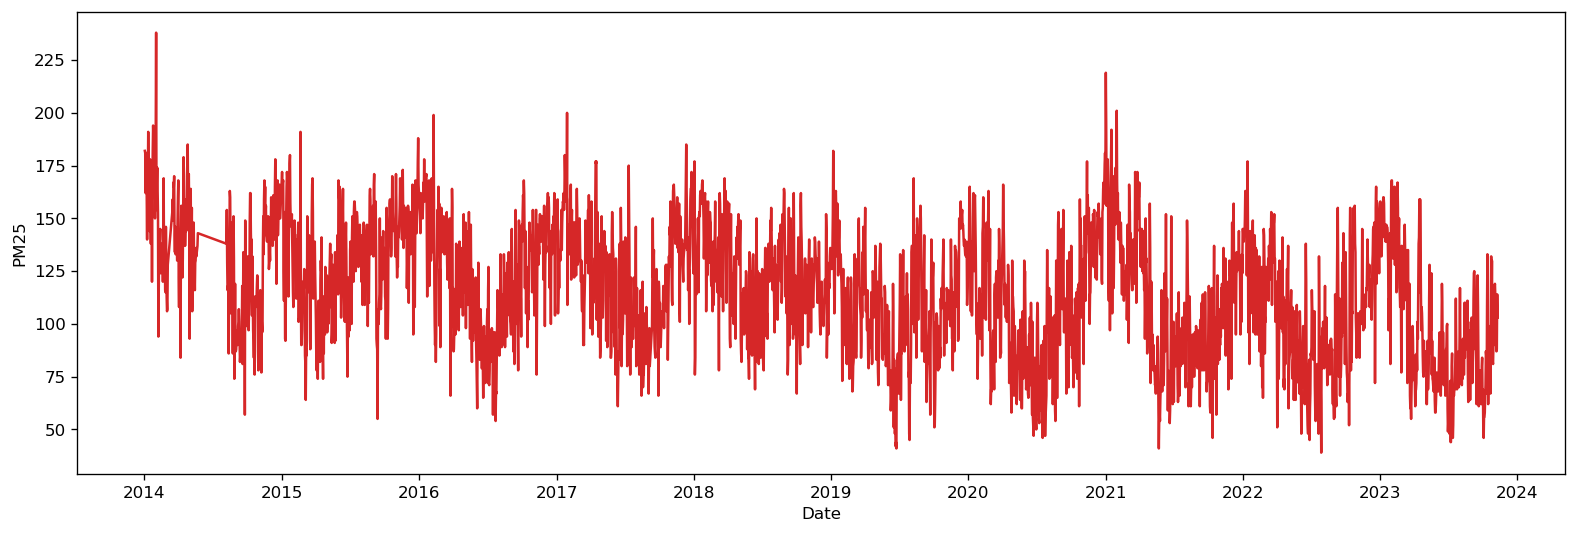

In [10]:
plot_df(pzh_df, pzh_df.date, pzh_df.PM25, xlabel ='Date', ylabel ='PM25')

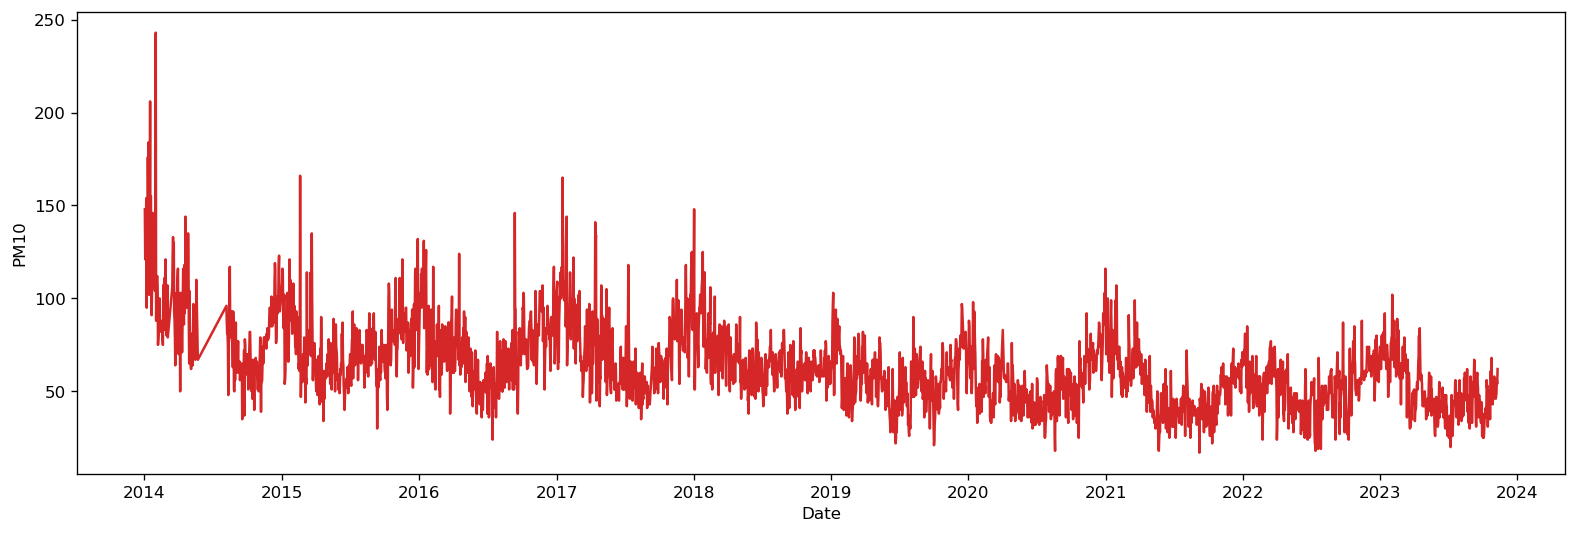

In [11]:
plot_df(pzh_df, pzh_df.date, pzh_df.PM10, xlabel ='Date', ylabel ='PM10')

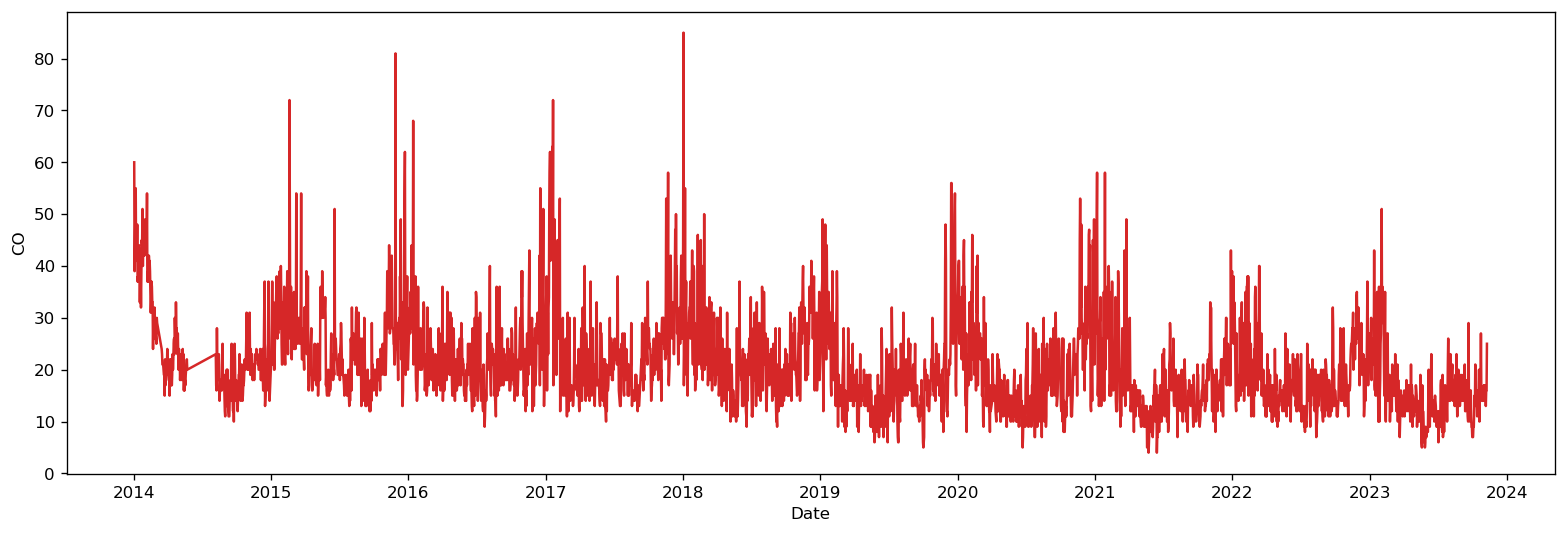

In [12]:
plot_df(pzh_df, pzh_df.date, pzh_df.CO, xlabel ='Date', ylabel ='CO')

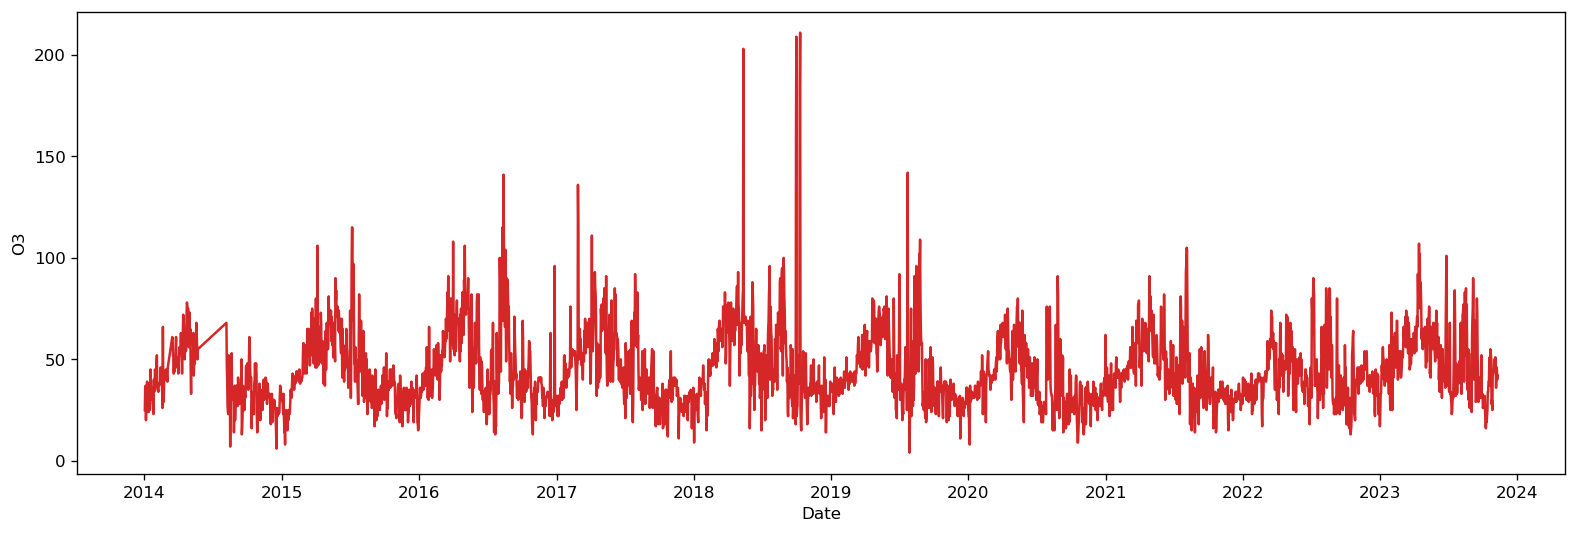

In [13]:
plot_df(pzh_df, pzh_df.date, pzh_df.O3, xlabel ='Date', ylabel ='O3')

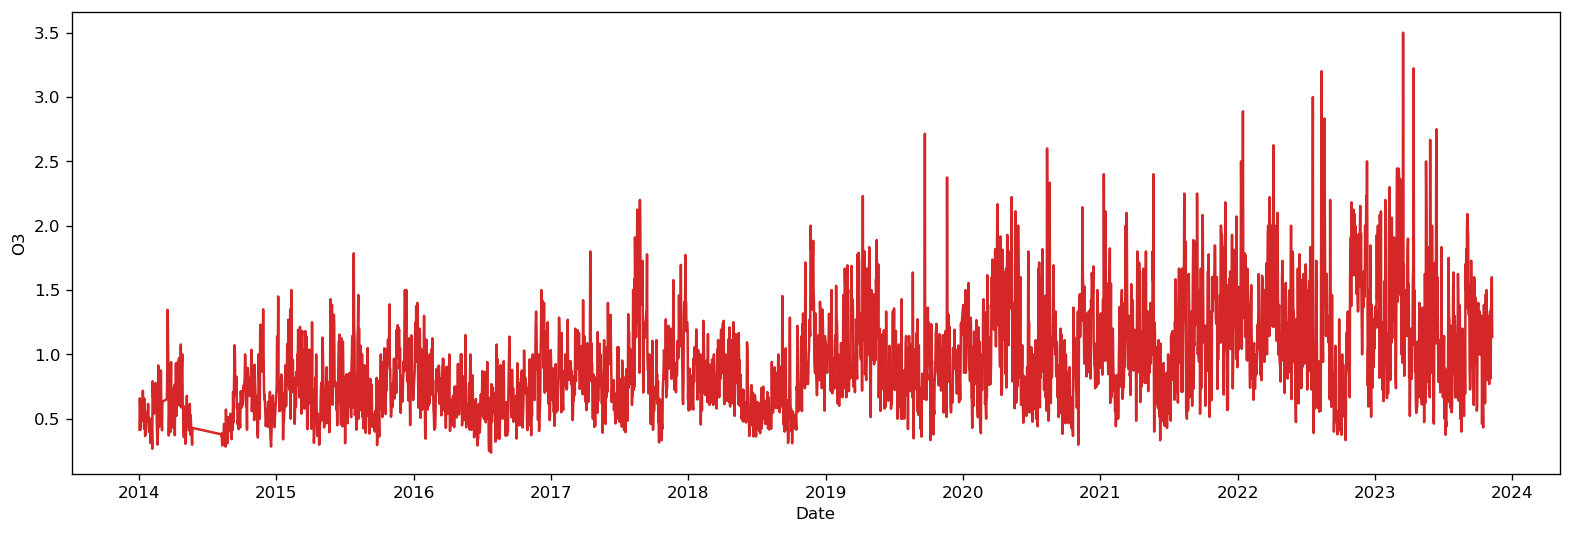

In [14]:
plot_df(pzh_df, pzh_df.date, pzh_df.NO2/pzh_df.SO2, xlabel ='Date', ylabel ='O3')

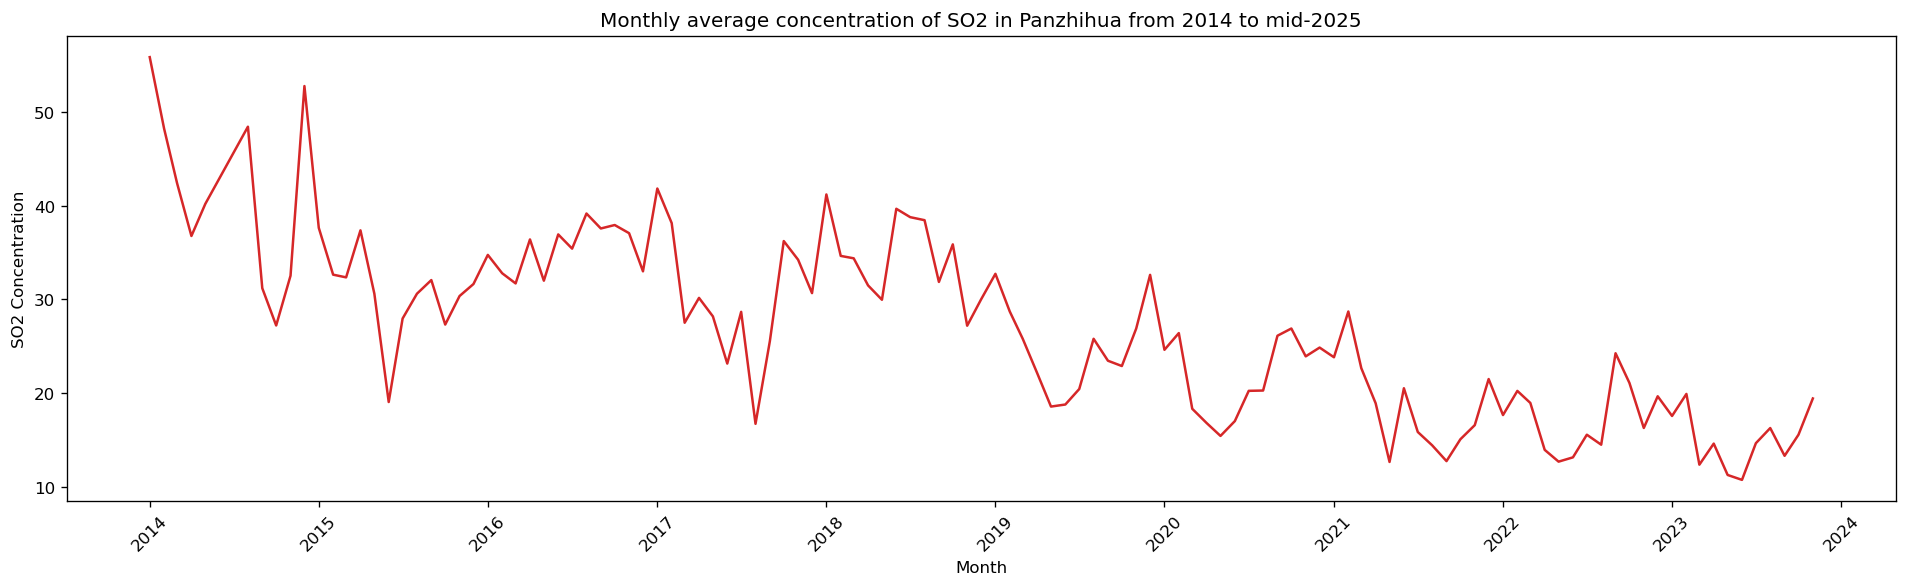

In [15]:
monthlyAverage(pzh_df, 'Panzhihua','SO2')

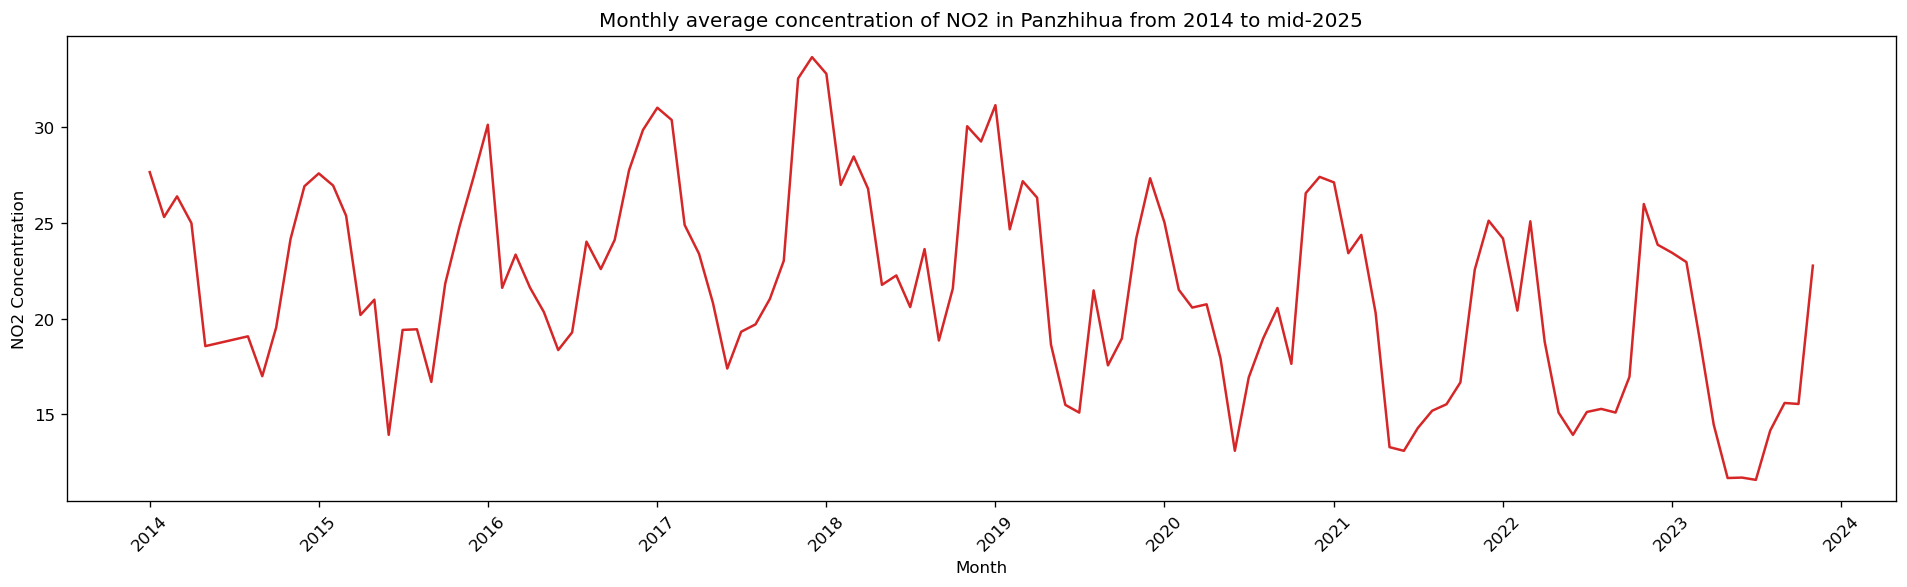

In [16]:
monthlyAverage(pzh_df, 'Panzhihua','NO2')

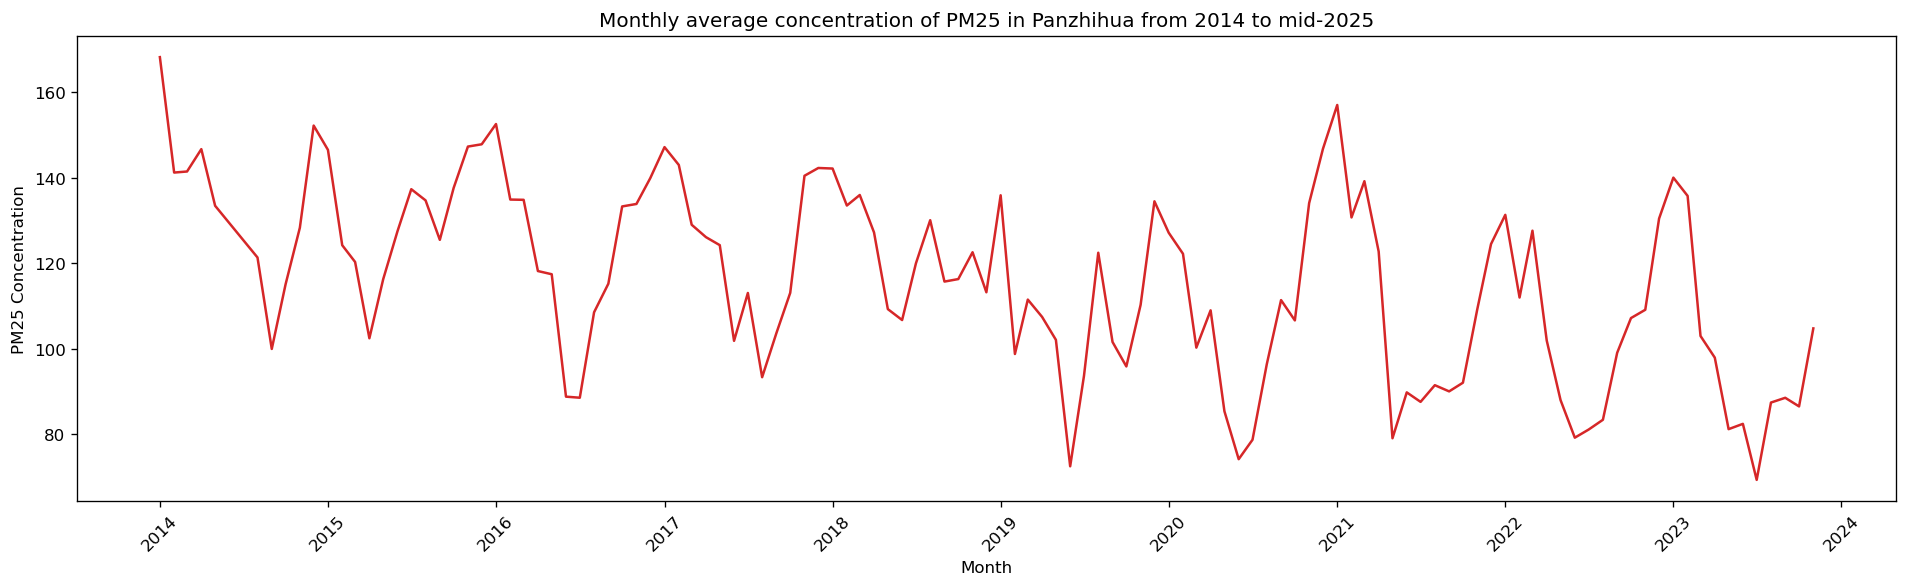

In [17]:
monthlyAverage(pzh_df, 'Panzhihua','PM25')

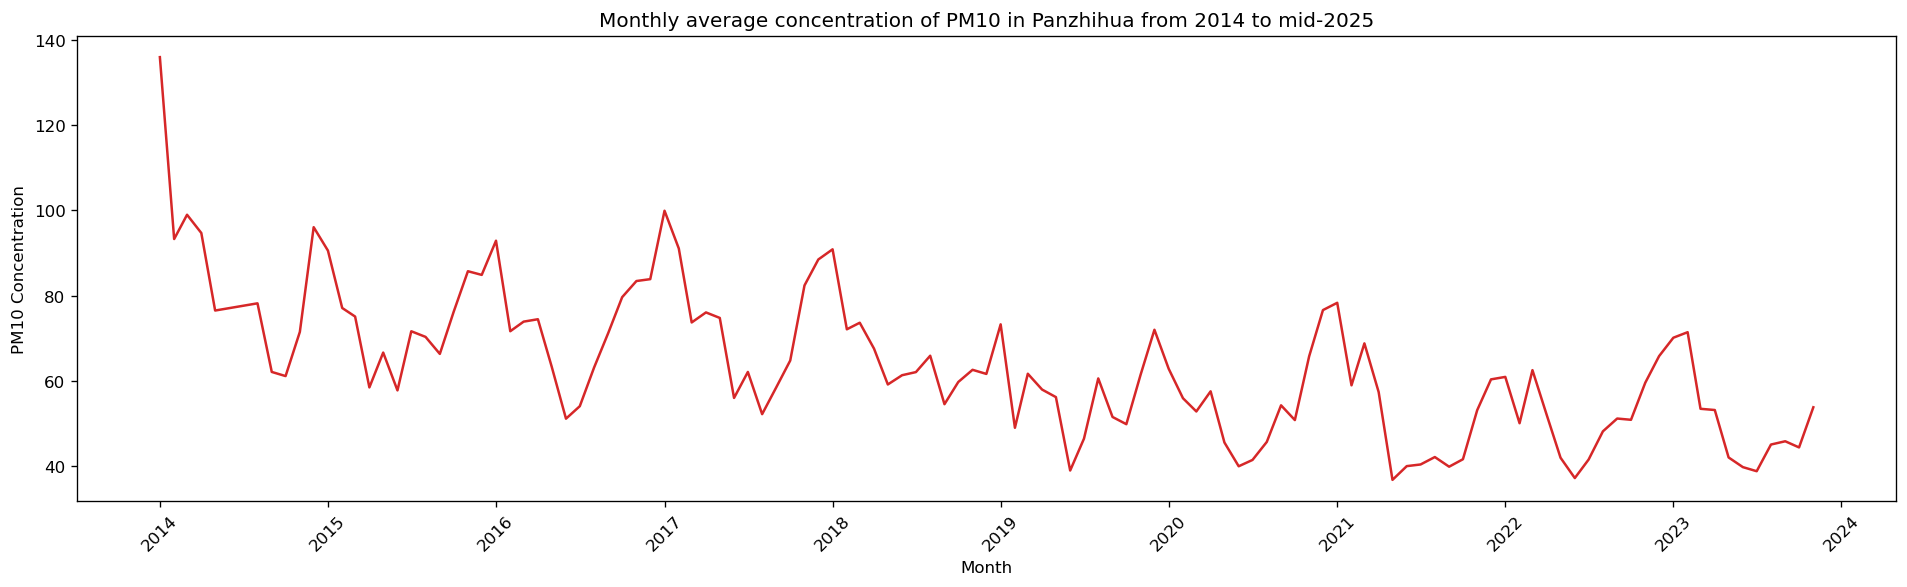

In [18]:
monthlyAverage(pzh_df, 'Panzhihua','PM10')

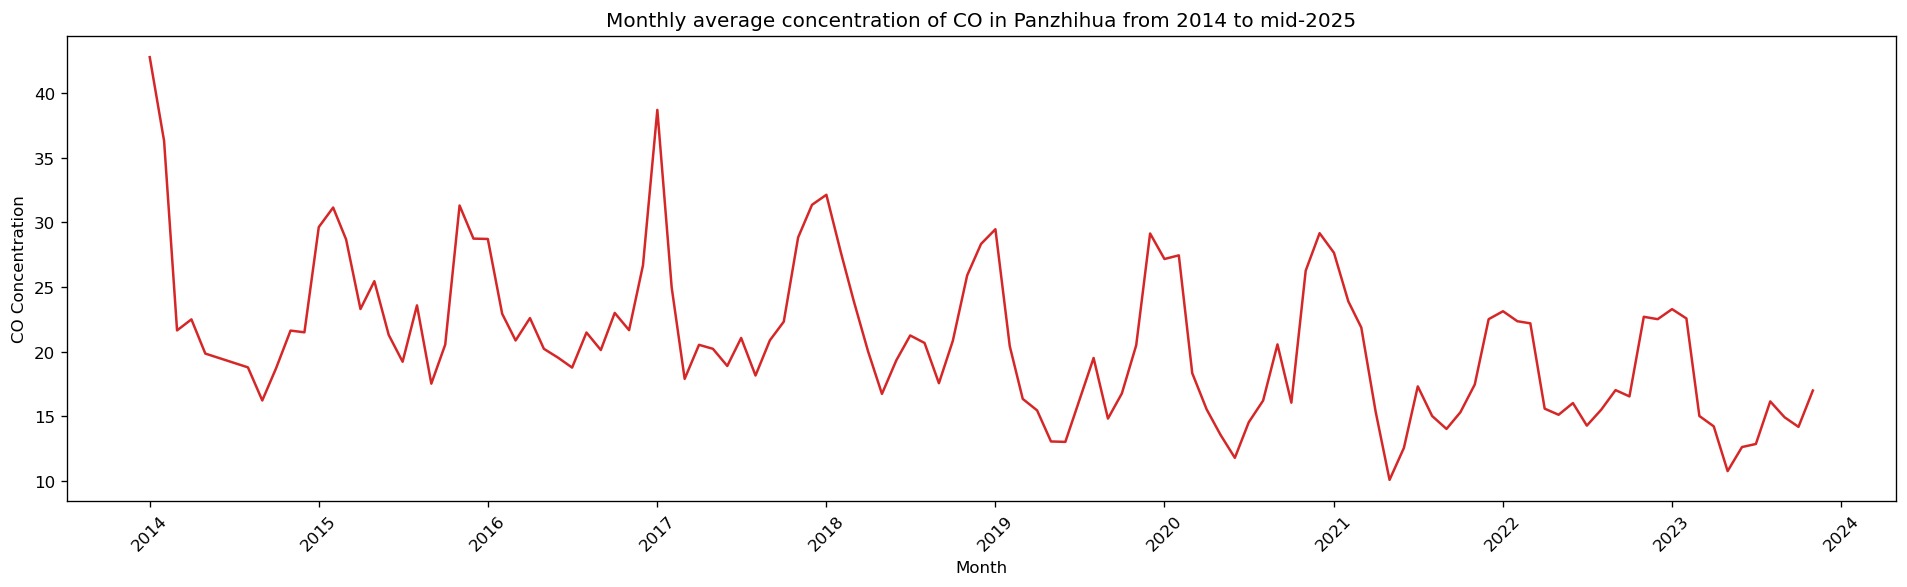

In [19]:
monthlyAverage(pzh_df, 'Panzhihua','CO')

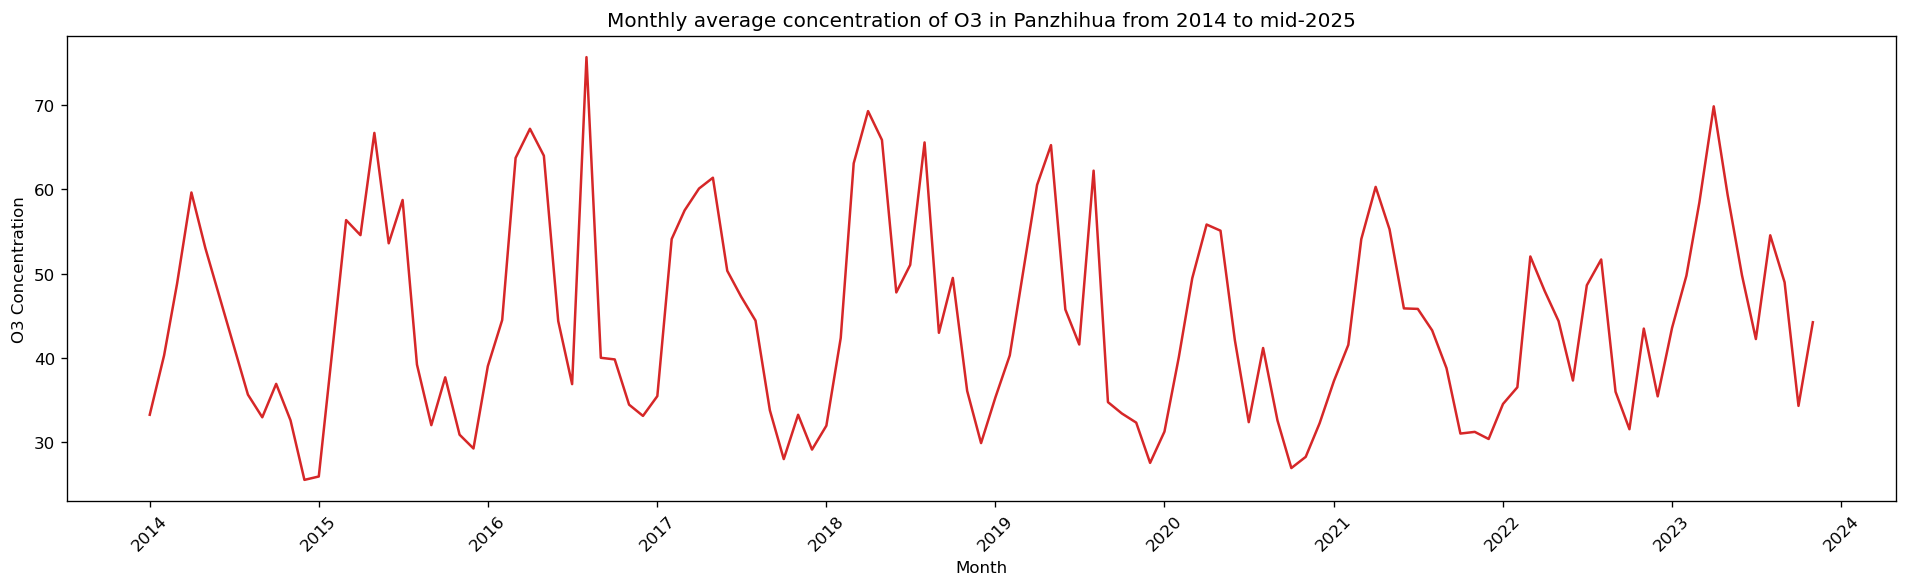

In [20]:
monthlyAverage(pzh_df, 'Panzhihua','O3')

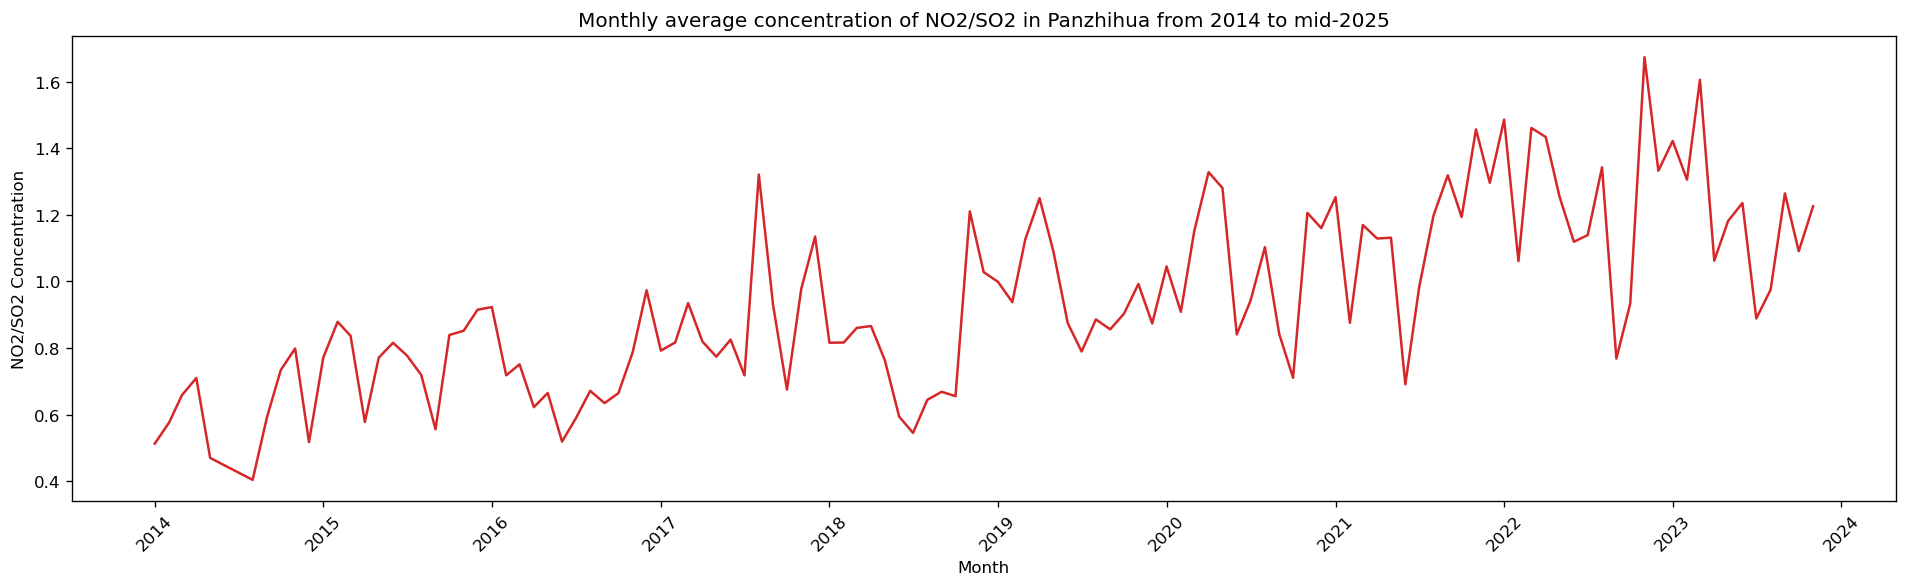

In [21]:
monthlyAverage(pzh_df, 'Panzhihua','NO2/SO2')

# Considering the change of pollutants.

Let $P_t$ denote the value of air pollutant $P$ on day $t$, and $P_{t-1}$ the value on onday prior. To quantify day-to-day changes and capture the seasonal patterns, we consider the following expression:
$$
\log \frac{P_t}{P_{t-1}}
$$
This quantity allows us to measure how pollutant levels fluctuate over time and analyze the distribution of these changes.

Furthermore, to capture broader trends, we compute the cumulative sum of these daily changes.

In [22]:
df_ratio(pzh_df)
pzh_df_ratio = df_ratio(pzh_df).drop(columns=['NO2/SO2'])
pzh_df_ratio

date  PM25_ratio  PM10_ratio  O3_ratio  NO2_ratio  SO2_ratio  \
590  2023-11-08    0.101469   -0.138150 -0.048790  -0.040822  -0.382992   
589  2023-11-07   -0.258862    0.036368  0.139762   0.040822   0.182322   
588  2023-11-06   -0.011429   -0.133531 -0.067441  -0.127833  -0.117783   
587  2023-11-05    0.044951   -0.041673 -0.177681   0.000000   0.523248   
586  2023-11-04    0.189621   -0.021506  0.266629  -0.095310  -0.587787   
...         ...         ...         ...       ...        ...        ...   
4101 2014-01-06    0.117093    0.483076  0.062520   0.143101   0.545227   
4100 2014-01-05   -0.039442   -0.067139 -0.500775   0.095310   0.135341   
4099 2014-01-04   -0.071459   -0.071973  0.615186  -0.095310  -0.399156   
4098 2014-01-03    0.110901   -0.102049 -0.027399  -0.105361  -0.256720   
4097 2014-01-02    0.005510    0.201422 -0.364643   0.230524   0.693147   

      CO_ratio  
590  -0.446287  
589   0.000000  
588  -0.207639  
587   0.207639  
586   0.060625  
...        ...  
4101  0.293761  
4100 -0.095310  
4099 -0.150823  
4098 -0.097638  
4097  0.430783  

[3487 rows x 7 columns]

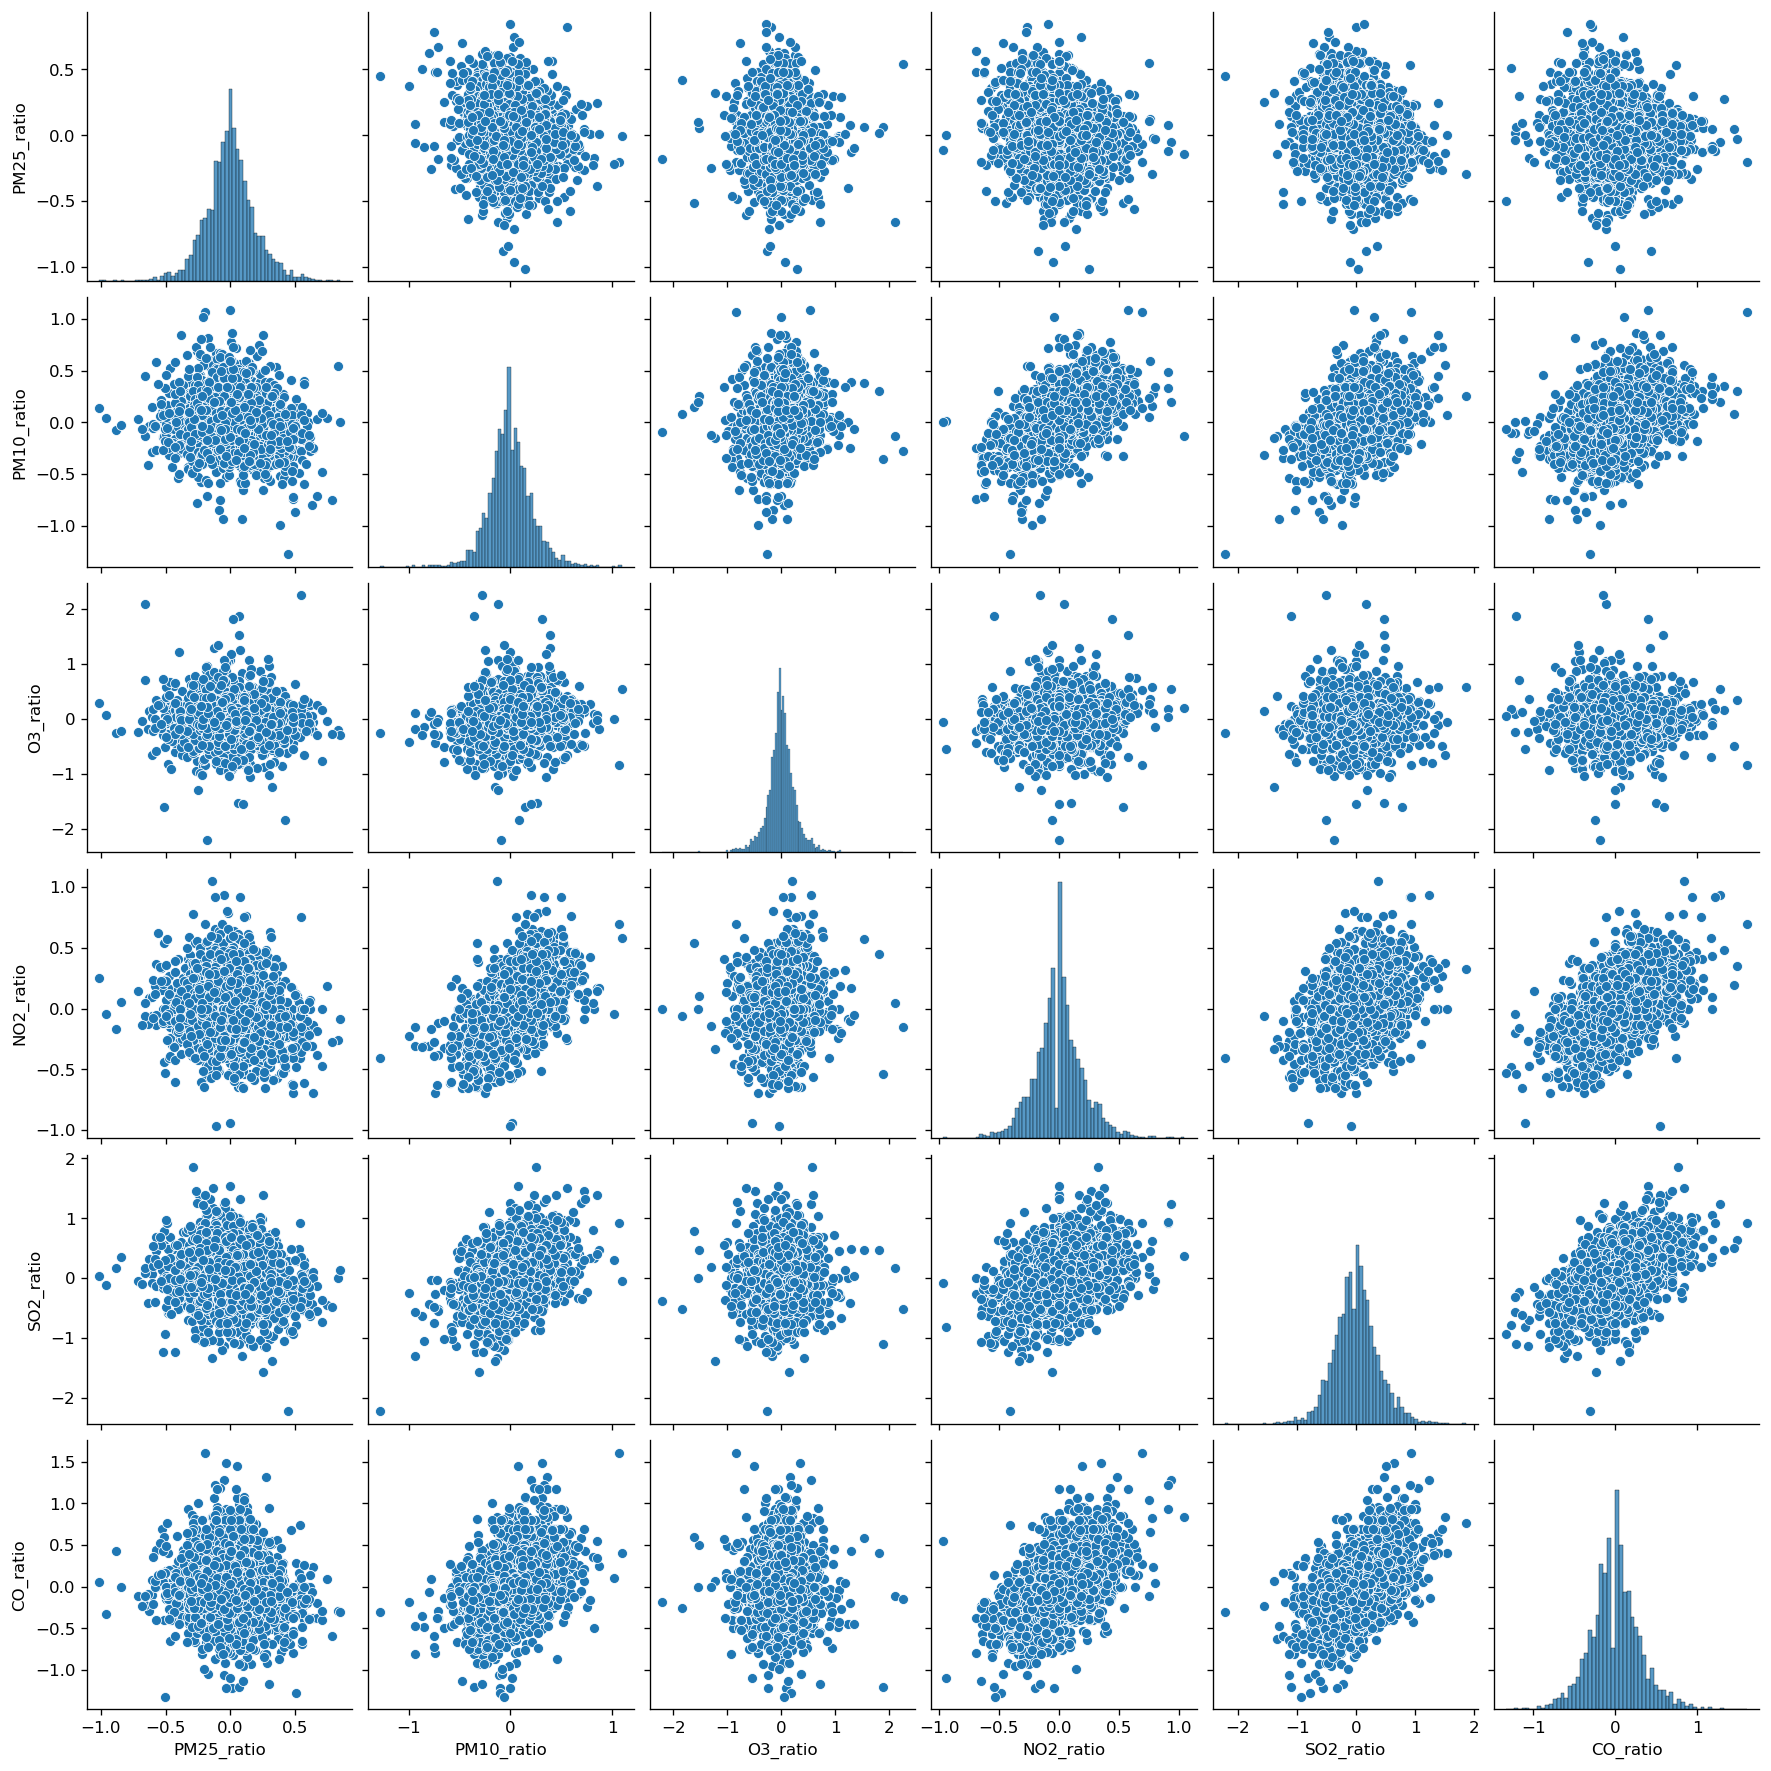

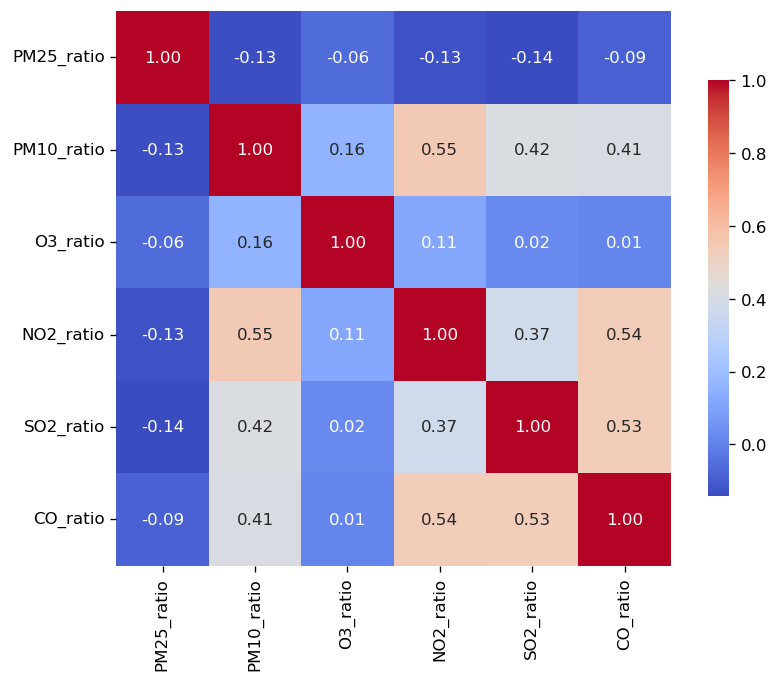

In [23]:
air_pairplot (pzh_df_ratio)
air_cormatrix(pzh_df_ratio)

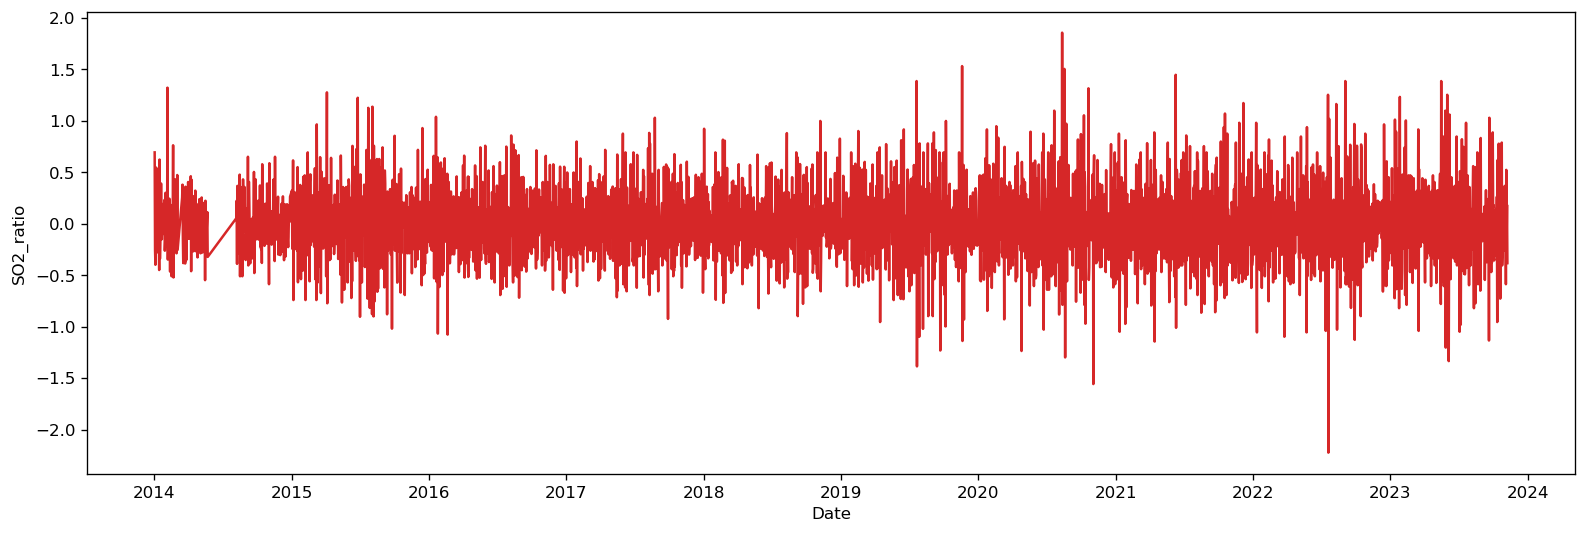

In [24]:
plot_df(pzh_df_ratio, pzh_df_ratio.date, pzh_df_ratio.SO2_ratio, xlabel ='Date', ylabel ='SO2_ratio')

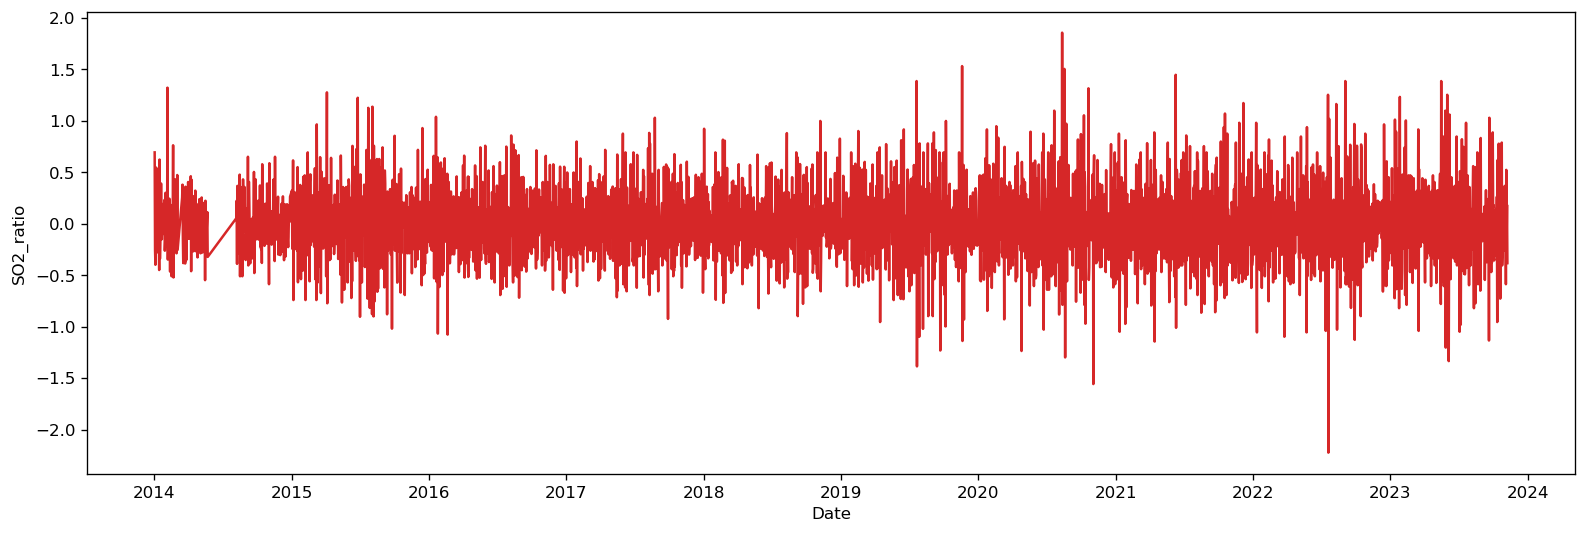

In [25]:
plot_df(pzh_df_ratio, pzh_df_ratio.date, pzh_df_ratio.SO2_ratio, xlabel ='Date', ylabel ='SO2_ratio')

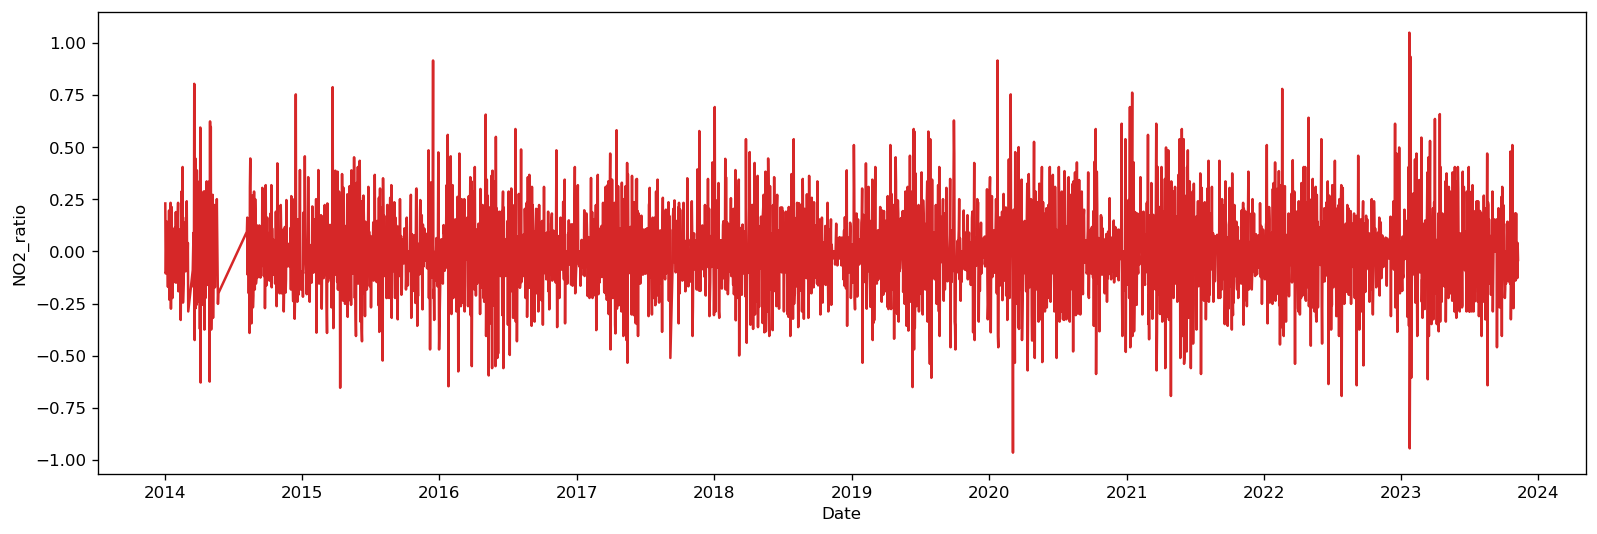

In [26]:
plot_df(pzh_df_ratio, pzh_df_ratio.date, pzh_df_ratio.NO2_ratio, xlabel ='Date', ylabel ='NO2_ratio')

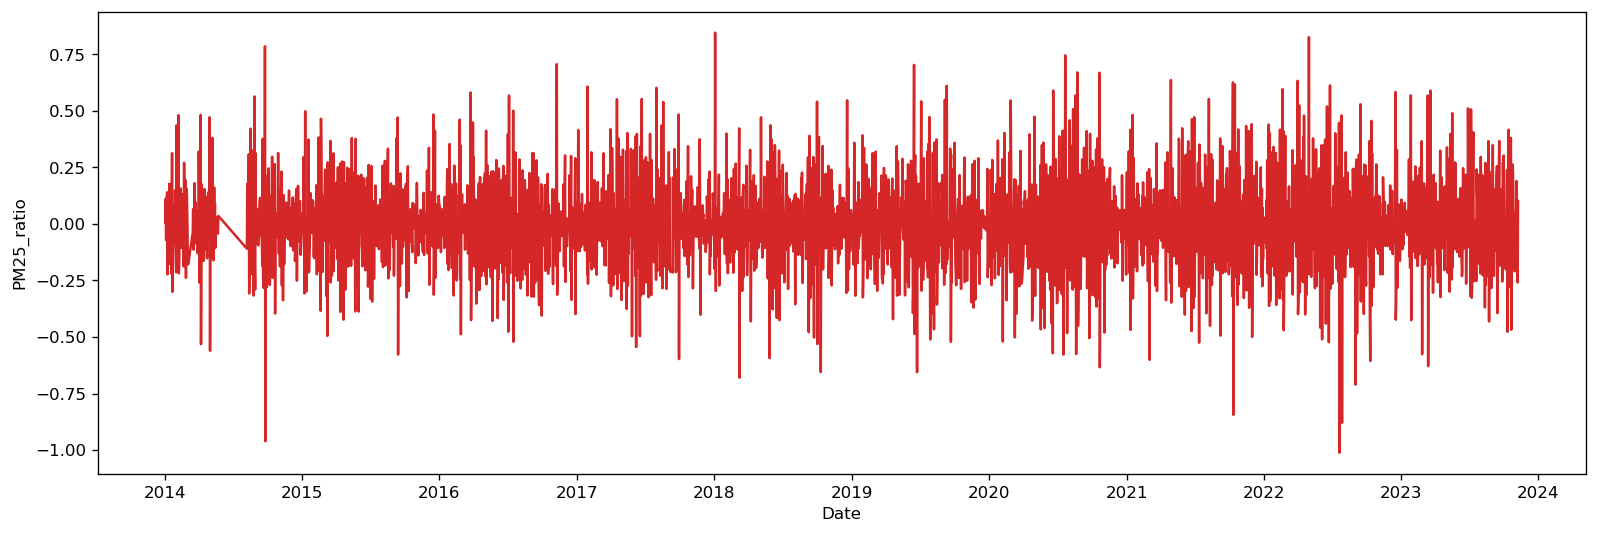

In [27]:
plot_df(pzh_df_ratio, pzh_df_ratio.date, pzh_df_ratio.PM25_ratio, xlabel ='Date', ylabel ='PM25_ratio')

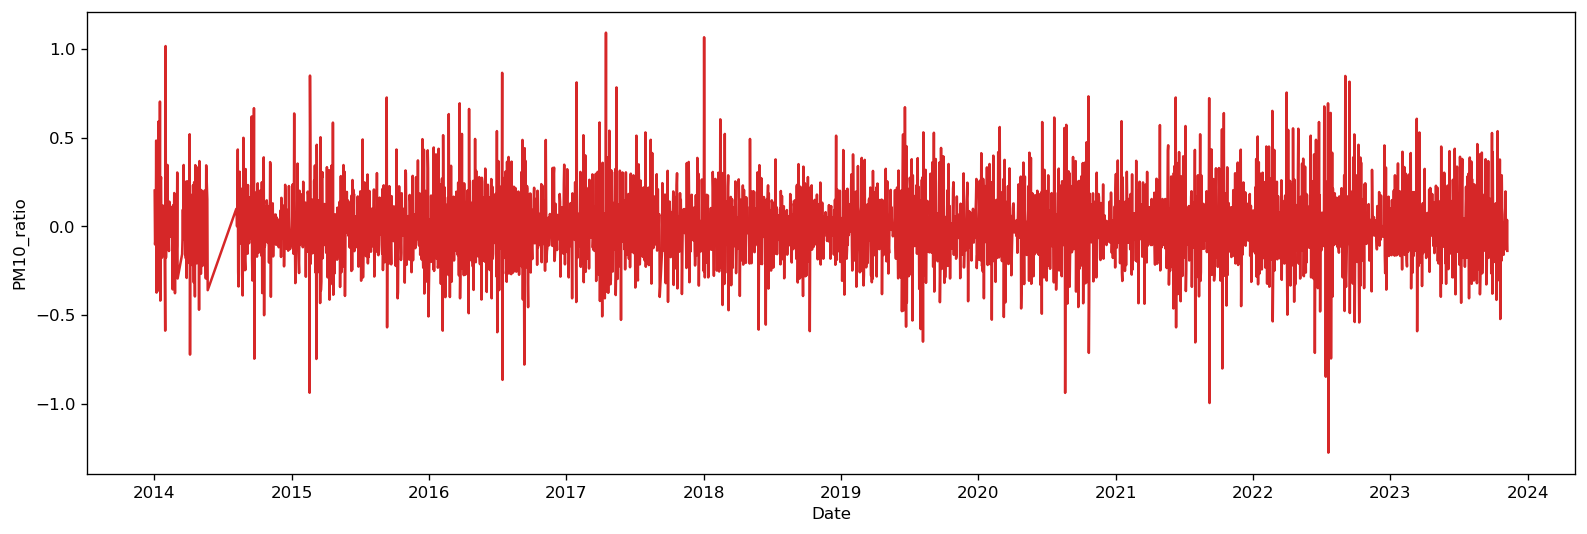

In [28]:
plot_df(pzh_df_ratio, pzh_df_ratio.date, pzh_df_ratio.PM10_ratio, xlabel ='Date', ylabel ='PM10_ratio')

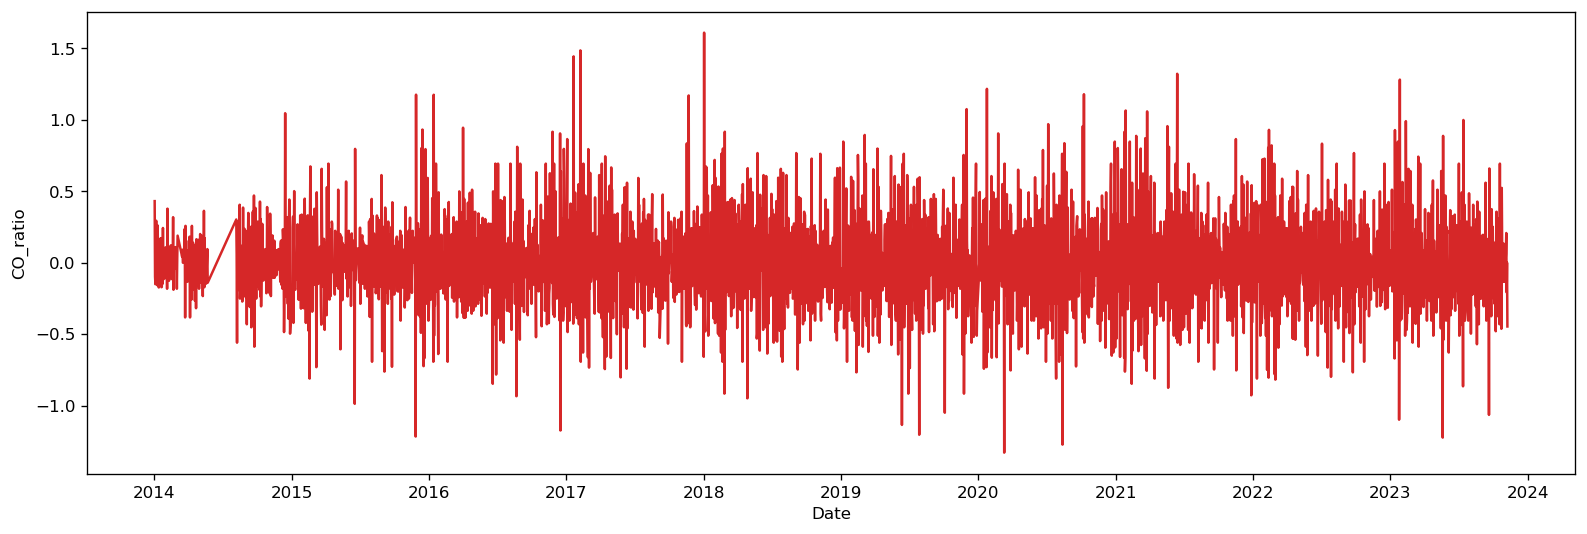

In [29]:
plot_df(pzh_df_ratio, pzh_df_ratio.date, pzh_df_ratio.CO_ratio, xlabel ='Date', ylabel ='CO_ratio')

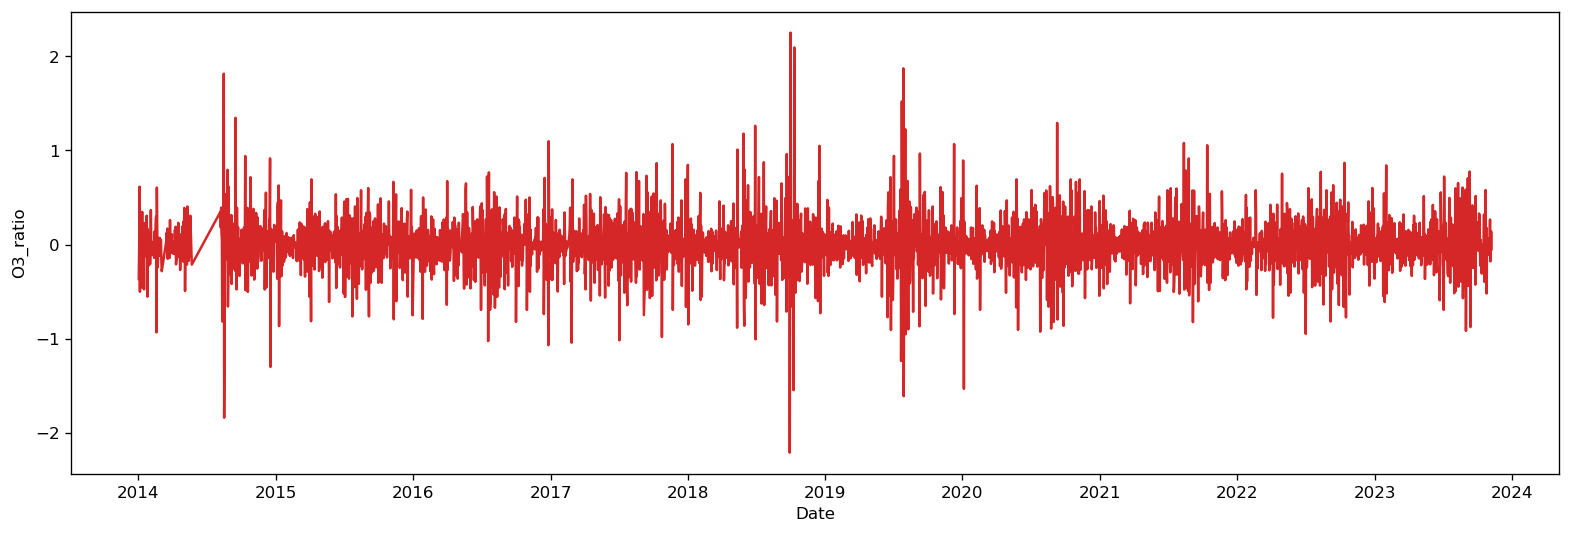

In [30]:
plot_df(pzh_df_ratio, pzh_df_ratio.date, pzh_df_ratio.O3_ratio, xlabel ='Date', ylabel ='O3_ratio')

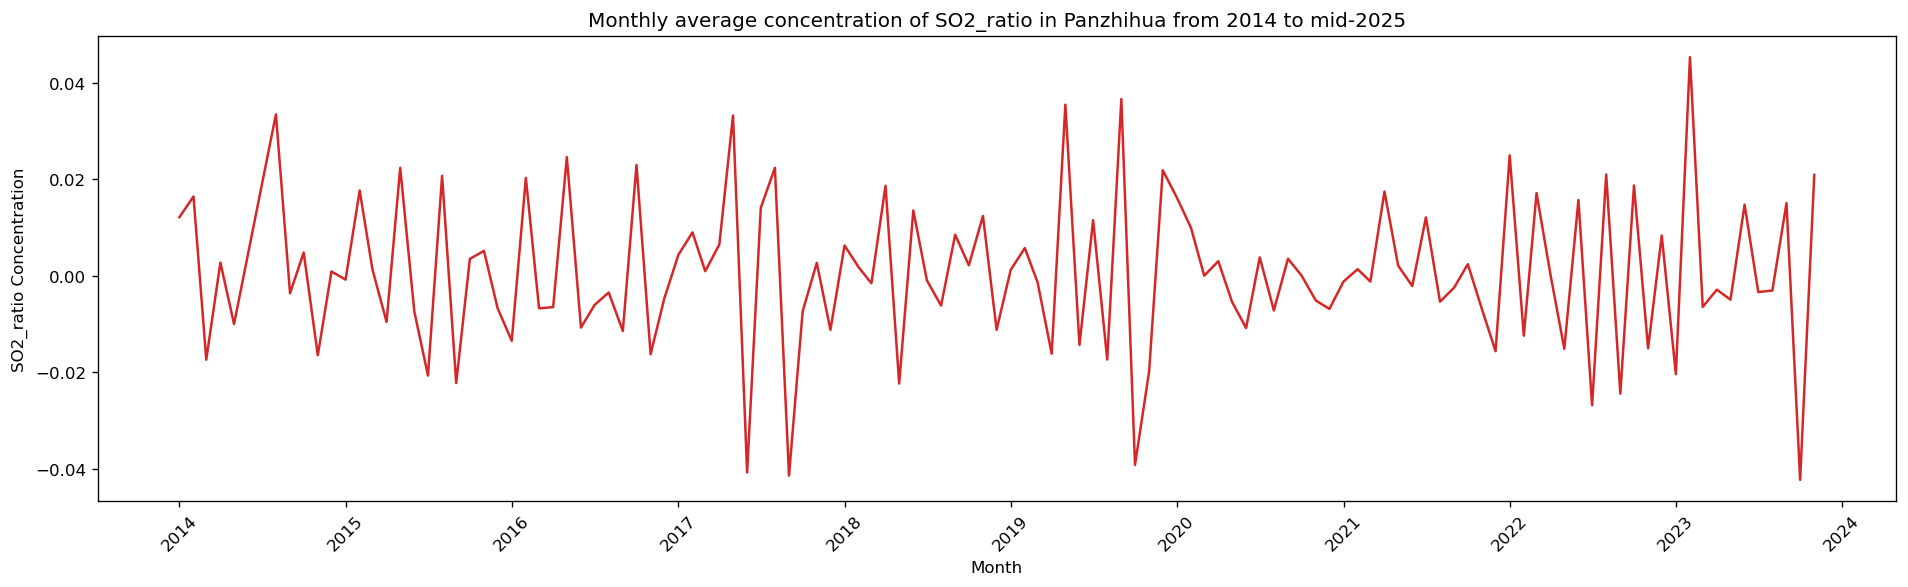

In [31]:
monthlyAverage(pzh_df_ratio, 'Panzhihua','SO2_ratio')

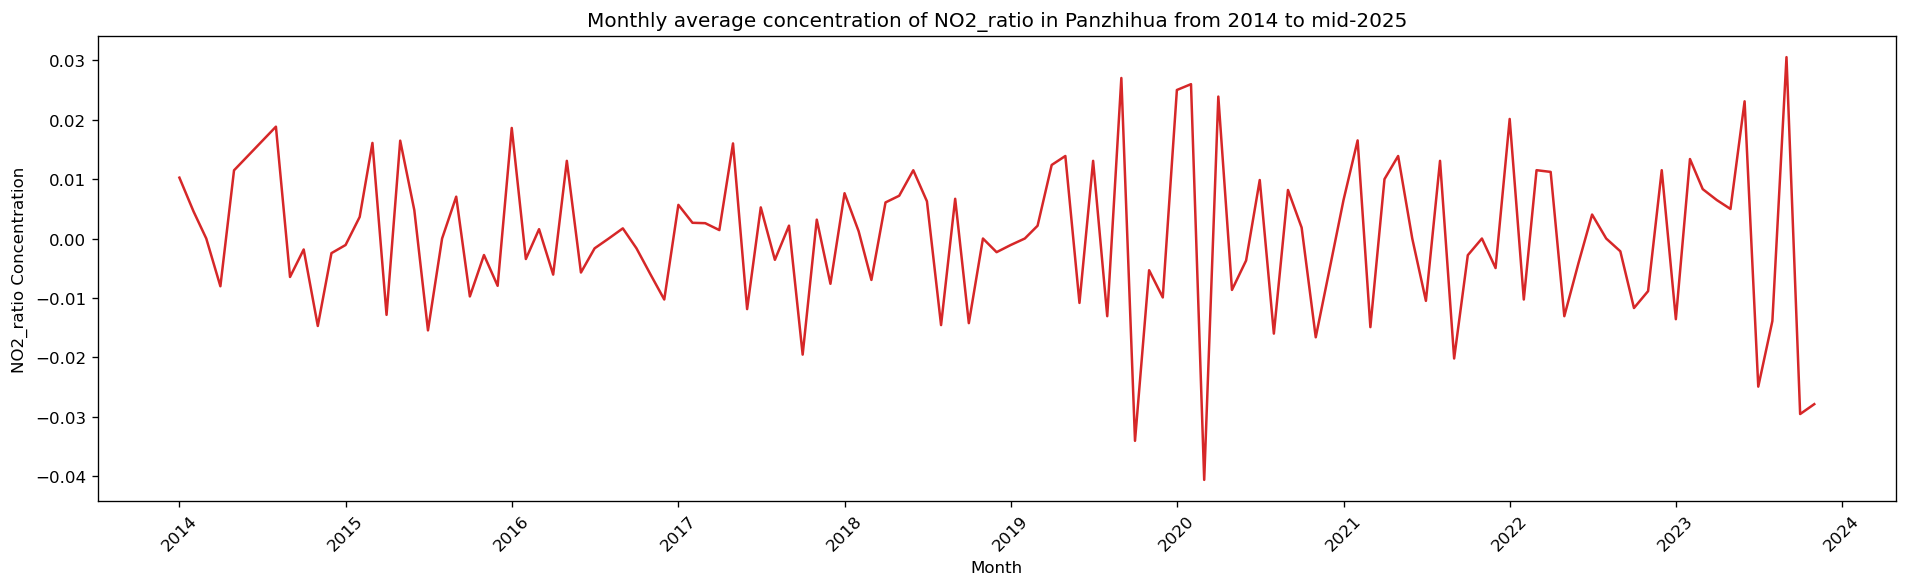

In [32]:
monthlyAverage(pzh_df_ratio, 'Panzhihua','NO2_ratio')

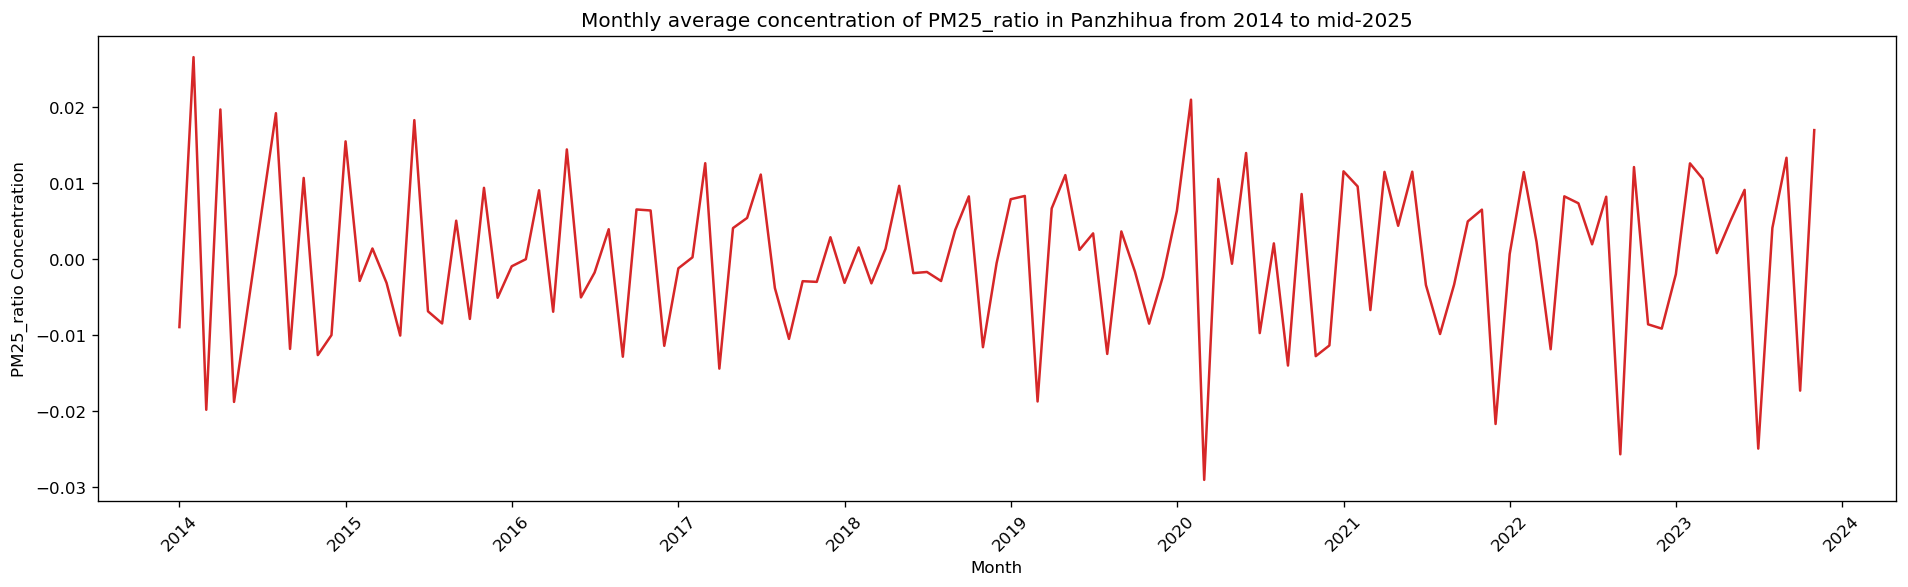

In [33]:
monthlyAverage(pzh_df_ratio, 'Panzhihua','PM25_ratio')

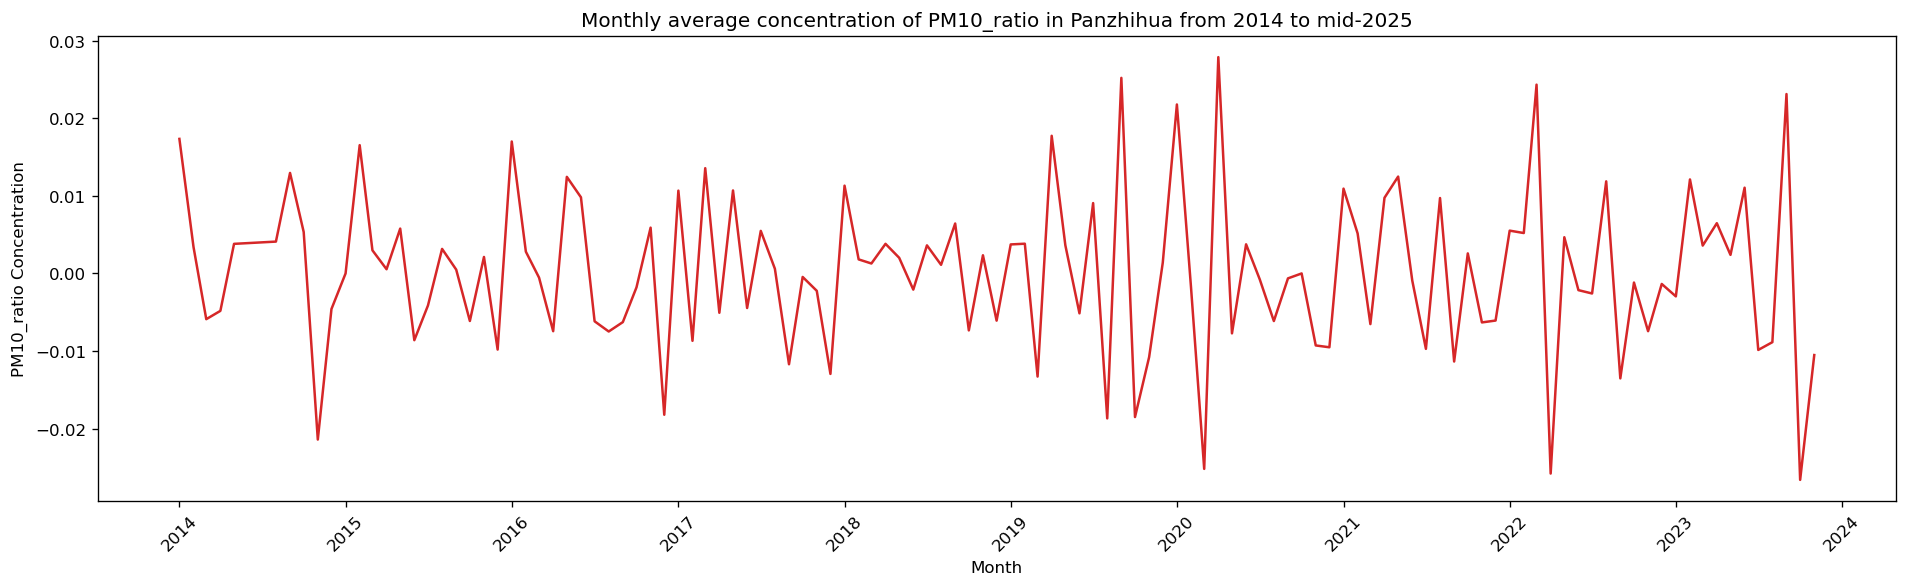

In [34]:
monthlyAverage(pzh_df_ratio, 'Panzhihua','PM10_ratio')

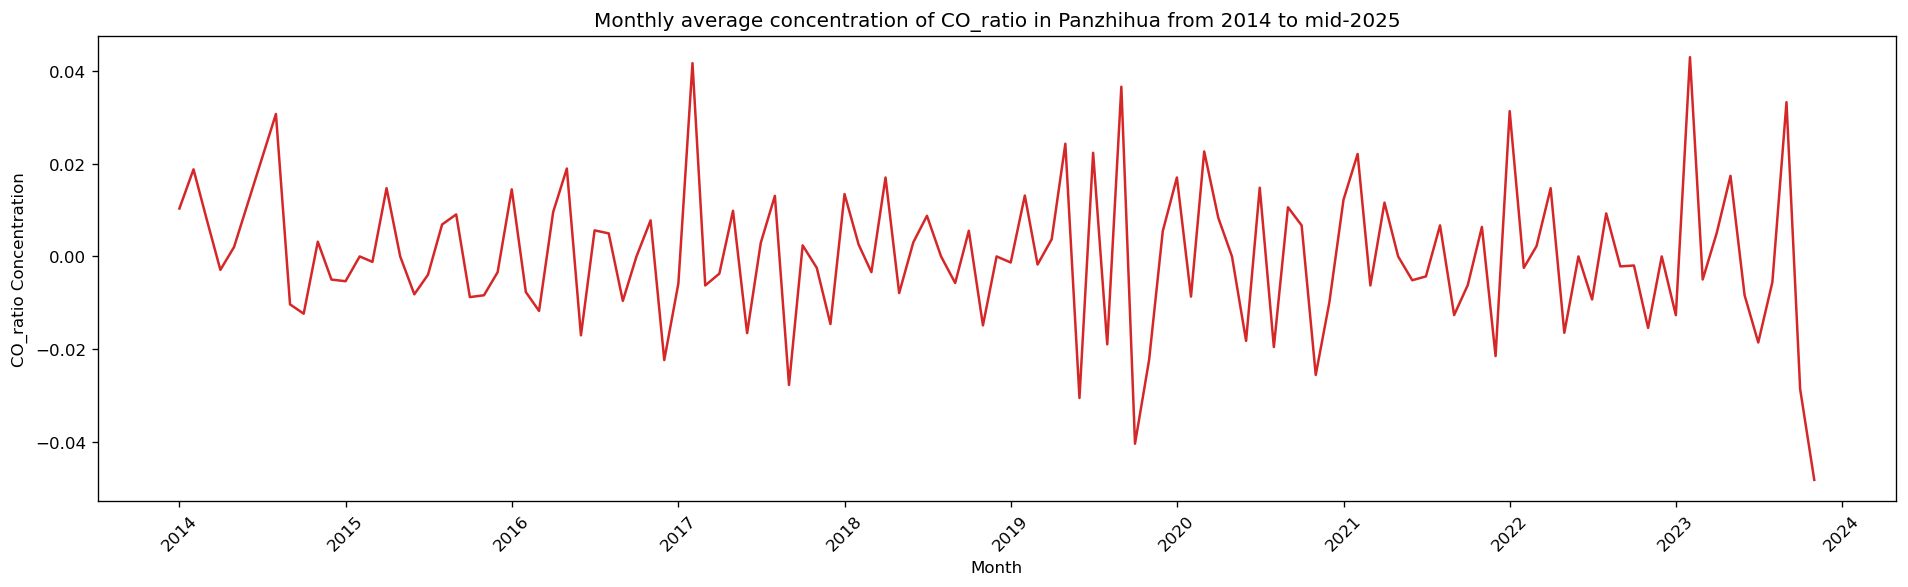

In [35]:
monthlyAverage(pzh_df_ratio, 'Panzhihua','CO_ratio')

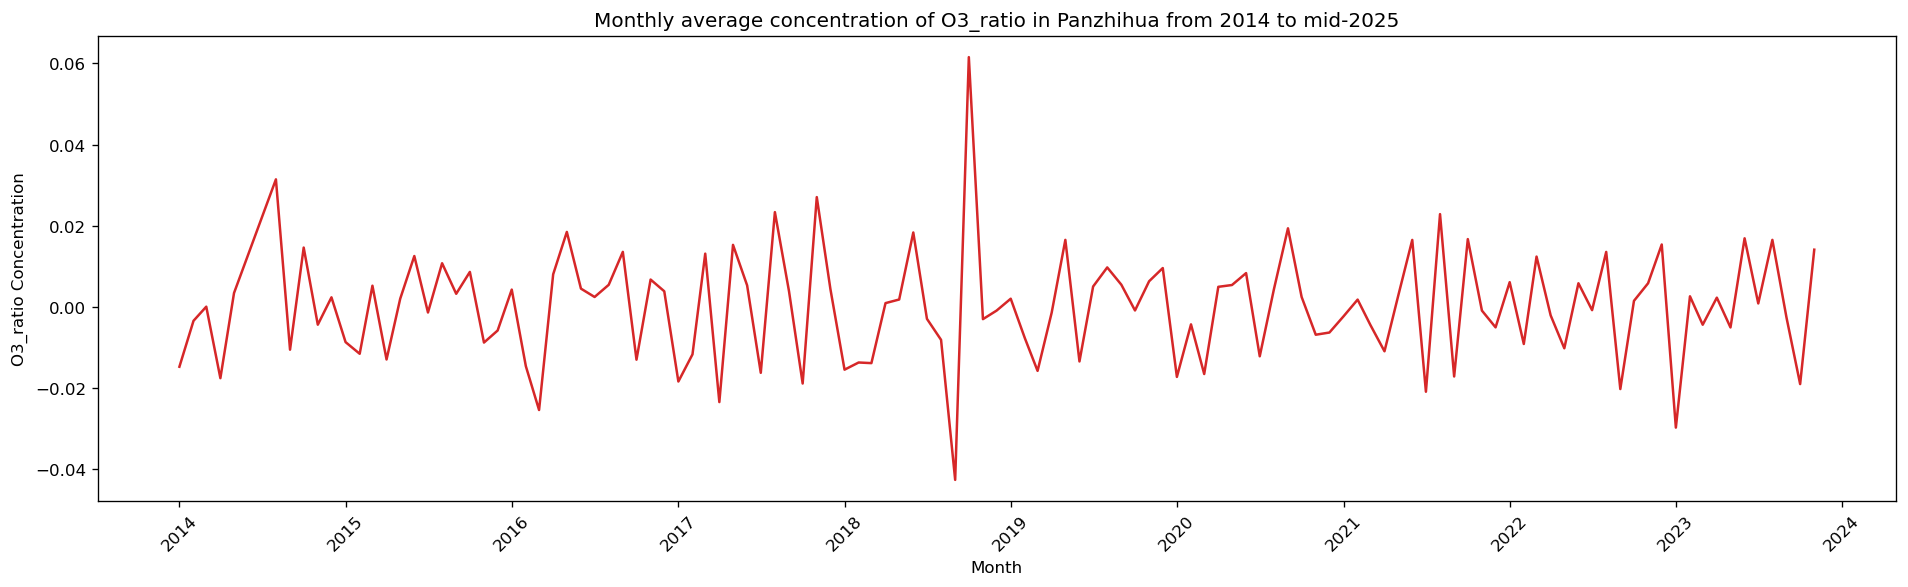

In [36]:
monthlyAverage(pzh_df_ratio, 'Panzhihua','O3_ratio')

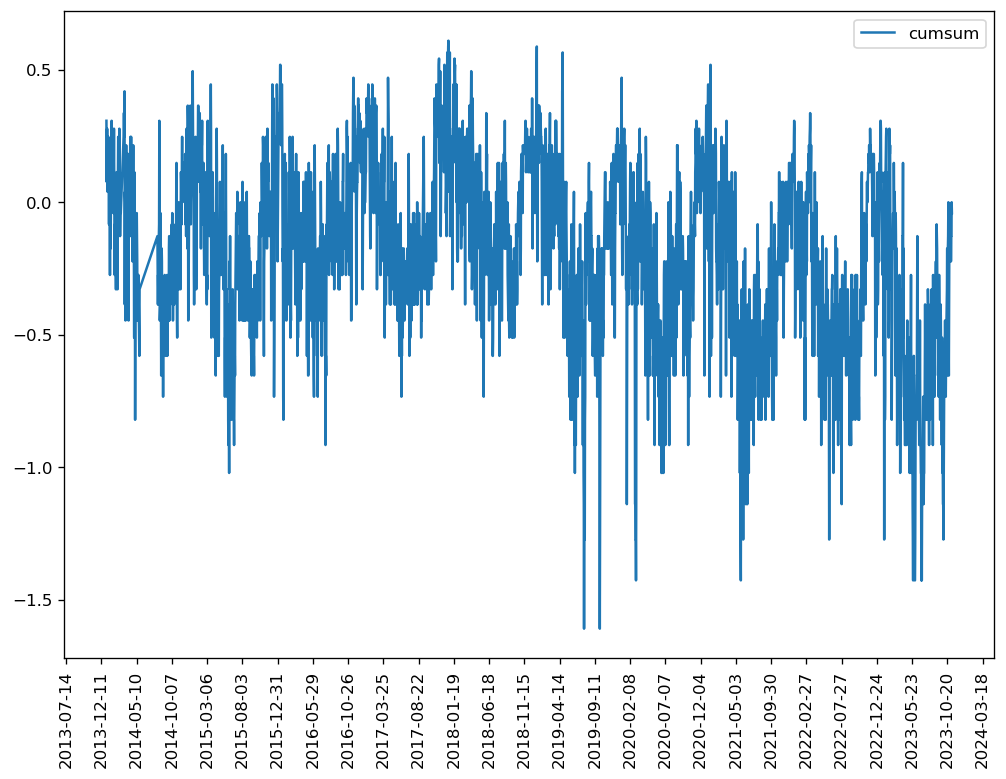

In [37]:
pzh_df_ratio['log_cumsum_no2'] = pzh_df_ratio['NO2_ratio'].cumsum()
plt.plot(pzh_df_ratio['date'] ,pzh_df_ratio['log_cumsum_no2'], label ='cumsum')
plt.xticks(rotation=90)
plt.legend()
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(30))

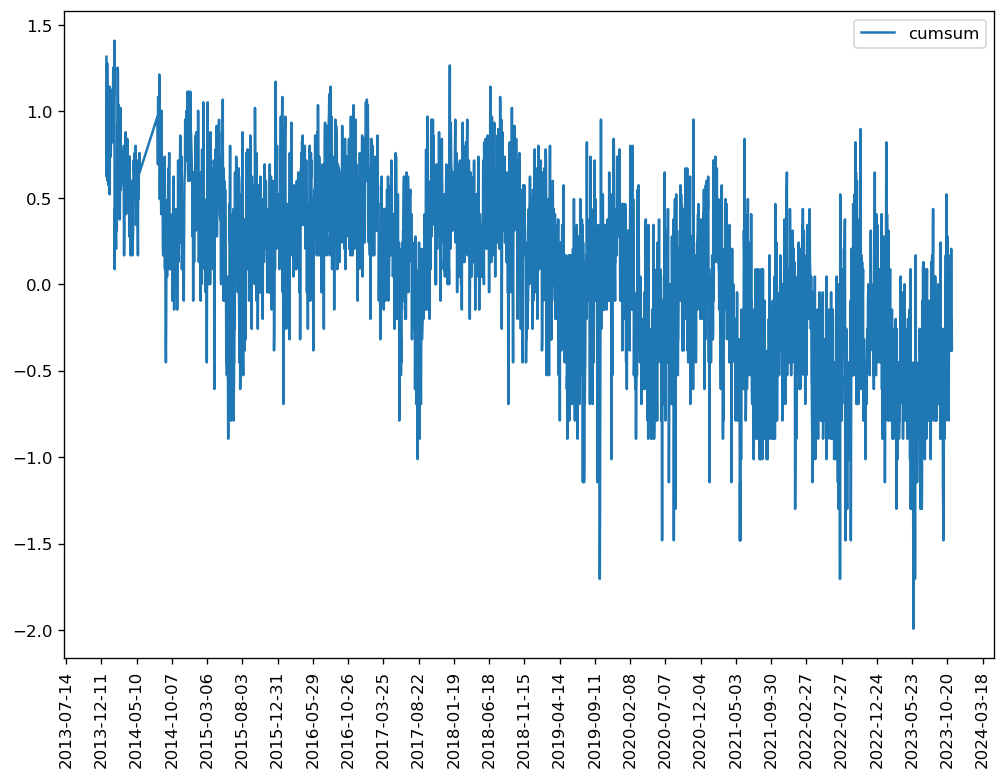

In [38]:
pzh_df_ratio['log_cumsum_so2'] = pzh_df_ratio['SO2_ratio'].cumsum()
plt.plot(pzh_df_ratio['date'] ,pzh_df_ratio['log_cumsum_so2'], label ='cumsum')
plt.xticks(rotation=90)
plt.legend()
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(30))

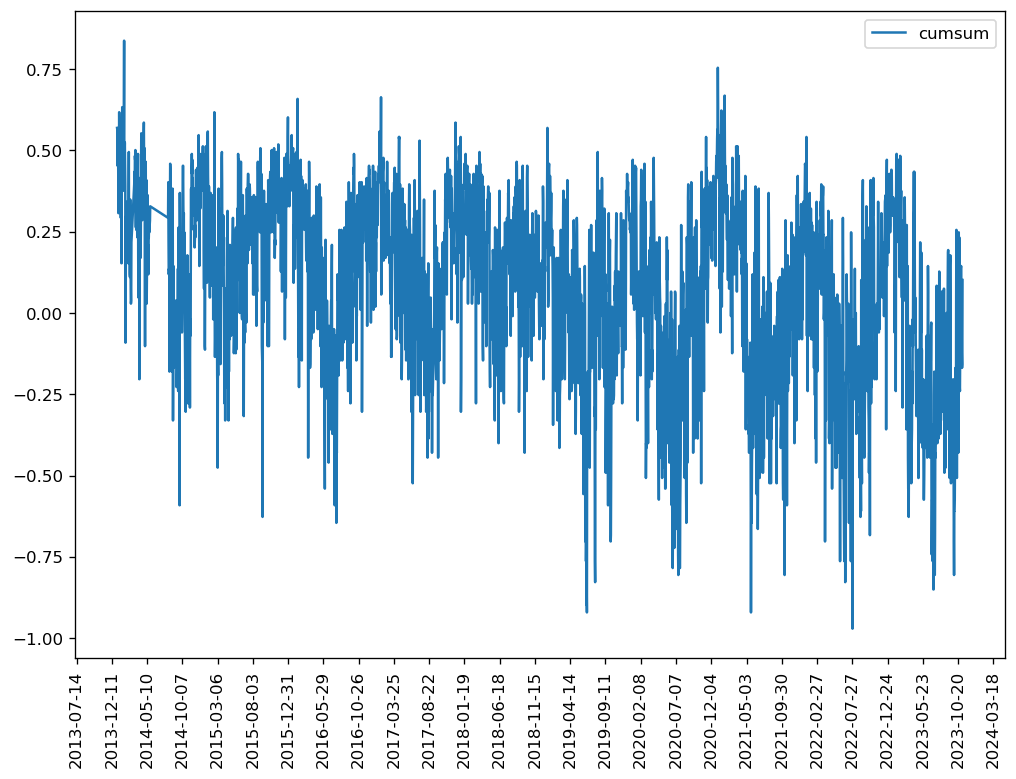

In [39]:
pzh_df_ratio['log_cumsum_pm25'] = pzh_df_ratio['PM25_ratio'].cumsum()
plt.plot(pzh_df_ratio['date'] ,pzh_df_ratio['log_cumsum_pm25'], label ='cumsum')
plt.xticks(rotation=90)
plt.legend()
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(30))

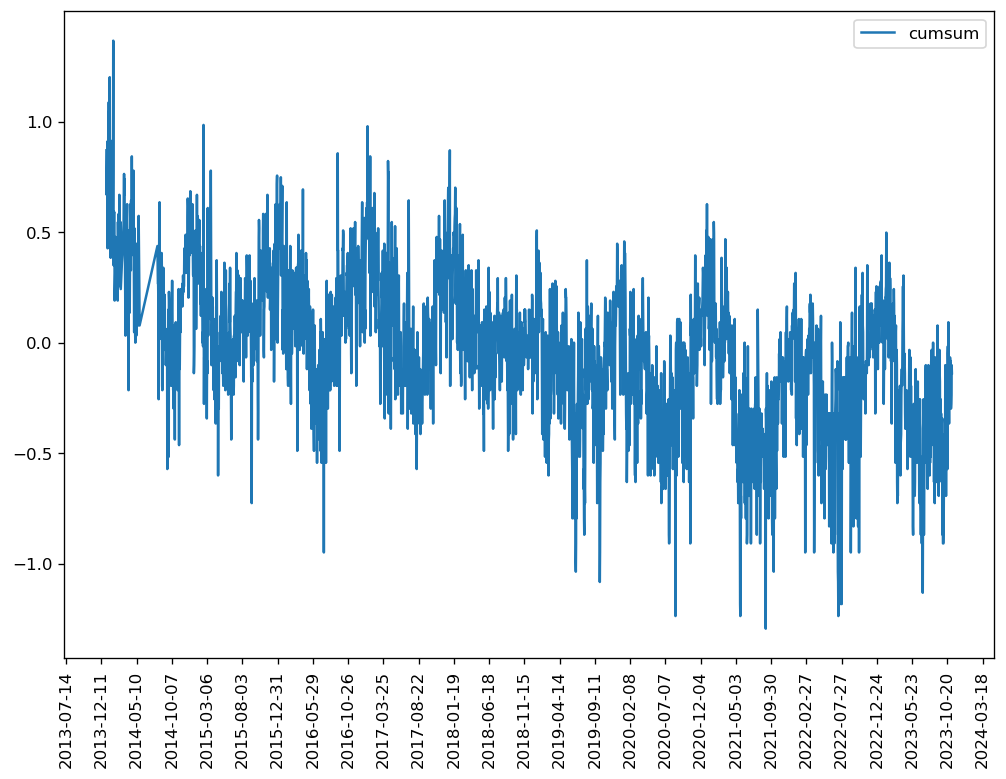

In [40]:
pzh_df_ratio['log_cumsum_pm10'] = pzh_df_ratio['PM10_ratio'].cumsum()
plt.plot(pzh_df_ratio['date'] ,pzh_df_ratio['log_cumsum_pm10'], label ='cumsum')
plt.xticks(rotation=90)
plt.legend()
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(30))

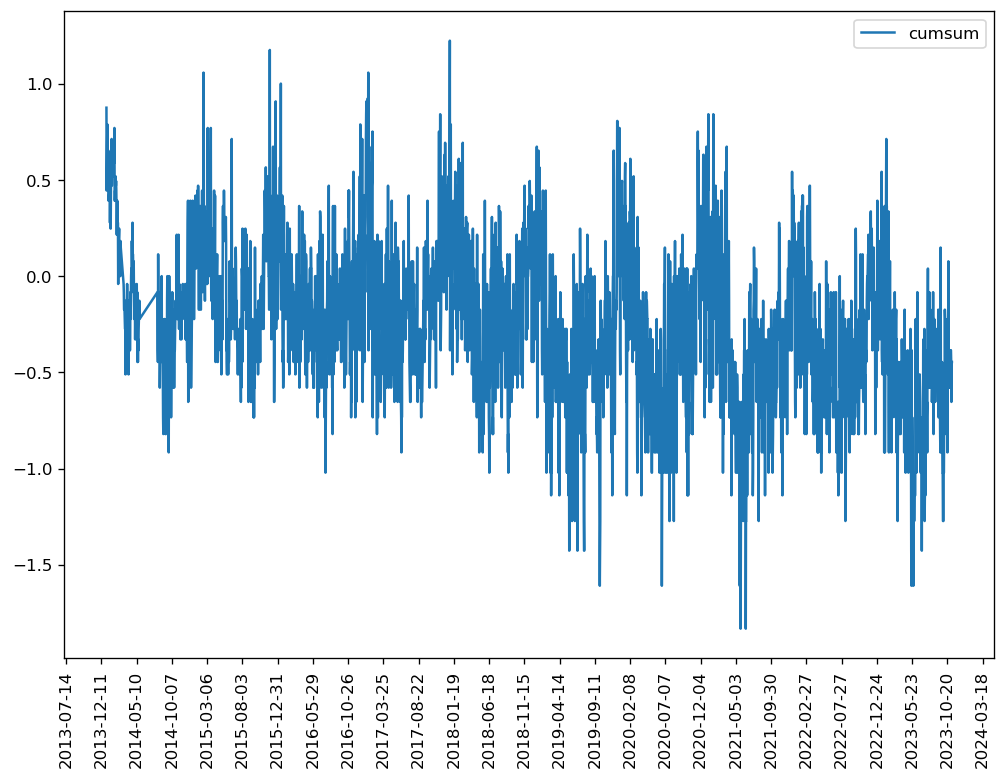

In [41]:
pzh_df_ratio['log_cumsum_co'] = pzh_df_ratio['CO_ratio'].cumsum()
plt.plot(pzh_df_ratio['date'] ,pzh_df_ratio['log_cumsum_co'], label ='cumsum')
plt.xticks(rotation=90)
plt.legend()
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(30))

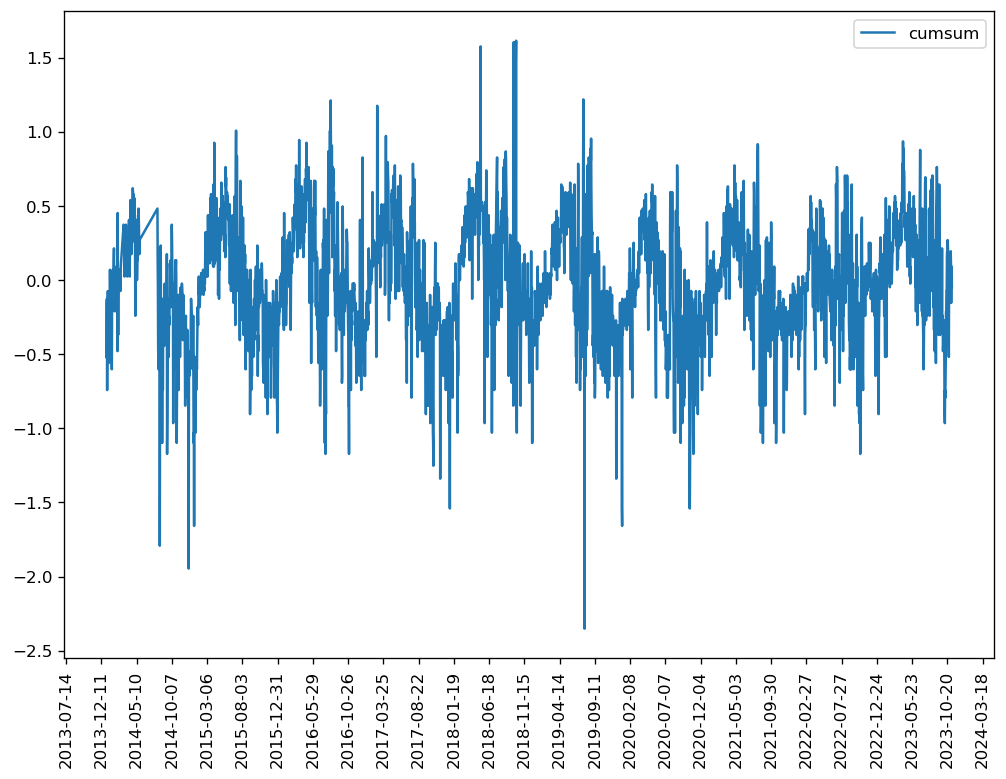

In [42]:
pzh_df_ratio['log_cumsum_o3'] = pzh_df_ratio['O3_ratio'].cumsum()
plt.plot(pzh_df_ratio['date'] ,pzh_df_ratio['log_cumsum_o3'], label ='cumsum')
plt.xticks(rotation=90)
plt.legend()
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(30))